# Credit EDA Assignment 

## Submitted By : Sushant Sarswat (C-38 Batch)

## 1. Problem Statement

    (a) To understand the driving factors (variables) behind loan default (i.e. Variables with strong indicator of default)

## 2. Objective

    (a) If the applicant is likely to repay the loan, then not approving the loan results in loss of business to the company. Therefore, ensure disbursal of loan to client likely to pay on time.
    
    (b) If applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to financial loss for the company. Therefore, prevent provisoning of loan to clients likely to default.

## 3. Import Libraries

    (a) Import necessary libraries for use in EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  #To ignore the excessive warnings that may result during the usage of seaborn

## 4. Data Importing

    (a) Import and read the dataset into the Python program

In [2]:
%cd C:\Users\SAMSUNG\Documents\Python Scripts 

C:\Users\SAMSUNG\Documents\Python Scripts


In [3]:
#Read datasets into respective dataframes

df_previous = pd.read_csv('previous_application.csv') 
df_application = pd.read_csv('application_data.csv')
df_columns = pd.read_csv('columns_description.csv')

## 5. Data Familiarization
    
    (a) To familiarize ourselves with the Data 

In [4]:
#Shape of Dataframes

print('Shape of df_previous: ', df_previous.shape)
print('Shape of df_application: ', df_application.shape)
print('Shape of df_columns: ', df_columns.shape)

Shape of df_previous:  (1670214, 37)
Shape of df_application:  (307511, 122)
Shape of df_columns:  (160, 5)


In [5]:
#Info of Dataframes

df_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [6]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   160 non-null    int64 
 1   Table        160 non-null    object
 2   Row          160 non-null    object
 3   Description  160 non-null    object
 4   Special      69 non-null     object
dtypes: int64(1), object(4)
memory usage: 6.4+ KB


In [8]:
#Description of Dataframes

df_previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [9]:
df_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
df_columns.describe()

,Unnamed: 0
count,160.00000
mean,94.58750
std,64.12727
min,1.00000
25%,42.75000
50%,82.50000
75%,122.25000
max,213.00000


In [11]:
#Count of Unique values in Dataframes

df_previous.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

In [12]:
df_application.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [13]:
df_columns.nunique()

Unnamed: 0     160
Table            2
Row            152
Description    109
Special          6
dtype: int64

In [14]:
#Insight into Dataframe headers and index

df_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_columns.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


#### Note:  Since the 'Target' Variable is in 'df_application', we will initially focus on analysing the concerned dataframe.

## 6. Data Cleaning of 'df_application'

#### Note: Definition of 'Target' Variable as per 'df_columns':

    (a) 1 - Client with payment difficulties: He/She had late payment more than X days on at least one of the first Y installments of the loan in our sample
    
    (b) 0 - All other cases
    
    This will be our main column of concern since the company wants to understand the driving factors (or driver variables) behind loan default. i.e. The variables which are strong indicator of default. 

In [17]:
#Ascertain Sum of Missing Values Columnwise

def sum_missing_values_column(df):
    smvc=df.isnull().sum()
    return smvc

sum_missing_values_columnwise_df_application=sum_missing_values_column(df_application)
sum_missing_values_columnwise_df_application

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [18]:
#Ascertain Percentage of Missing Values Columnwise

def percentage_missing_values_column(df):
    pmvc=100.0*df.isnull().sum()/df.shape[0]
    return pmvc

percentage_missing_values_columnwise_df_application=percentage_missing_values_column(df_application)
percentage_missing_values_columnwise_df_application

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [19]:
#Total Number of Columns with Missing Values
sum_missing_values_columnwise_df_application[sum_missing_values_columnwise_df_application>0].count()

67

In [20]:
#Total Number of Columns with Missing Values percentage >50%
percentage_missing_values_columnwise_df_application[percentage_missing_values_columnwise_df_application>50].count()

41

#### Note: There are 41 columns in 'df_application' that have more than 50% values missing. We can remove these columns since these may not be able to aid us in our analysis.

In [21]:
#Columns with more than 50% data missing

Fifty_percent_missing_columns_df_application=percentage_missing_values_columnwise_df_application[percentage_missing_values_columnwise_df_application>50]
Fifty_percent_missing_columns_df_application

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

In [22]:
#Dropping Columns with more than 50% data missing from 'df_application'

df_application=df_application.drop(Fifty_percent_missing_columns_df_application.index,axis=1)


In [23]:
#To check whether the Columns have been dropped (Initial columns = 122)

df_application.shape

(307511, 81)

In [24]:
#Columns with missing data greater than 0 but less than equal to 50% in descending order

Less_than_Fifty_percent_missing_data_df_application = percentage_missing_values_columnwise_df_application[(percentage_missing_values_columnwise_df_application>0) & (percentage_missing_values_columnwise_df_application<=50)]
print(Less_than_Fifty_percent_missing_data_df_application.sort_values(ascending=False))
print('Number of Columns with missing data greater than 0% but less than equal to 50% : ',len(Less_than_Fifty_percent_missing_data_df_application.index))

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

#### Note: 

    (a) Since the given problem statement states that in EDA, it is not necessary to replace missing values, we will not replace any values.
    
    (b) We will however, indicate the approach for replacement of values. Towards this we will consider imputation of values in columns with missing values < 20%.

In [25]:
#Columns with missing data greater than 0 but less than equal to 20% in descending order

Less_than_Twenty_percent_missing_data_df_application = percentage_missing_values_columnwise_df_application[(percentage_missing_values_columnwise_df_application>0) & (percentage_missing_values_columnwise_df_application<=20)]
print(Less_than_Twenty_percent_missing_data_df_application.sort_values(ascending=False))
print('Number of Columns with missing data greater than 0% but less than equal to 20% : ',len(Less_than_Twenty_percent_missing_data_df_application.index))

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64
Number of Columns with missing data greater than 0% but less than equal to 20% :  17


In [26]:
#Number of unique values in columns having less than 20% missing values

df_application[Less_than_Twenty_percent_missing_data_df_application.index].nunique().sort_values(ascending=False)

EXT_SOURCE_2                  119831
AMT_ANNUITY                    13672
DAYS_LAST_PHONE_CHANGE          3773
AMT_GOODS_PRICE                 1002
EXT_SOURCE_3                     814
OBS_30_CNT_SOCIAL_CIRCLE          33
OBS_60_CNT_SOCIAL_CIRCLE          33
AMT_REQ_CREDIT_BUREAU_YEAR        25
AMT_REQ_CREDIT_BUREAU_MON         24
CNT_FAM_MEMBERS                   17
AMT_REQ_CREDIT_BUREAU_QRT         11
DEF_30_CNT_SOCIAL_CIRCLE          10
DEF_60_CNT_SOCIAL_CIRCLE           9
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
NAME_TYPE_SUITE                    7
AMT_REQ_CREDIT_BUREAU_HOUR         5
dtype: int64

#### Note: For the purpose of imputation, we will have to distinguish between the variables as follows:-

    (a) Continuous Variables : EXT_SOURCE_2, AMT_ANNUITY, DAYS_LAST_PHONE_CHANGE, AMT_GOODS_PRICE, EXT_SOURCE_3
    
    (b) Categorical Variables :OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_MON, CNT_FAM_MEMBERS, AMT_REQ_CREDIT_BUREAU_QRT, DEF_30_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, NAME_TYPE_SUITE, AMT_REQ_CREDIT_BUREAU_HOUR

### 6(a) Continuous Variables (Imputation Approach):

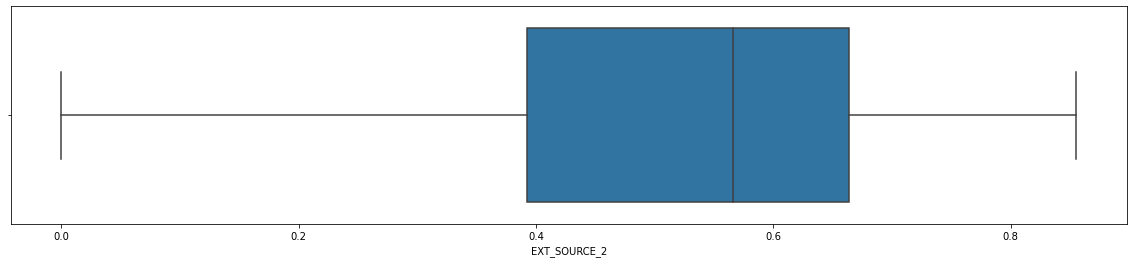

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [27]:
#For continuous variables, we will undertake Box Plotting to ascertain imputation of missing values with median or mean.

plt.figure(figsize=(20,4))
sns.boxplot(df_application.EXT_SOURCE_2)
plt.show()
df_application.EXT_SOURCE_2.describe()


#### Note: EXT_SOURCE_2 Mean and Median values are almost similar. Also, no outliers are present. Therefore, the missing values can be imputed with median value of 0.565 . <br> <br>



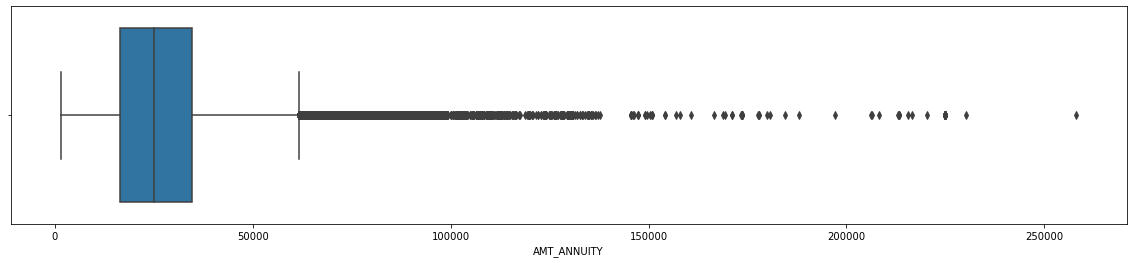

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [28]:
plt.figure(figsize=(20,4))
sns.boxplot(df_application.AMT_ANNUITY)
plt.show()
df_application.AMT_ANNUITY.describe()

#### Note: AMT_ANNUITY has outliers present in the data. Therefore, the missing data may be imputed with median value 24903. <br> <br>

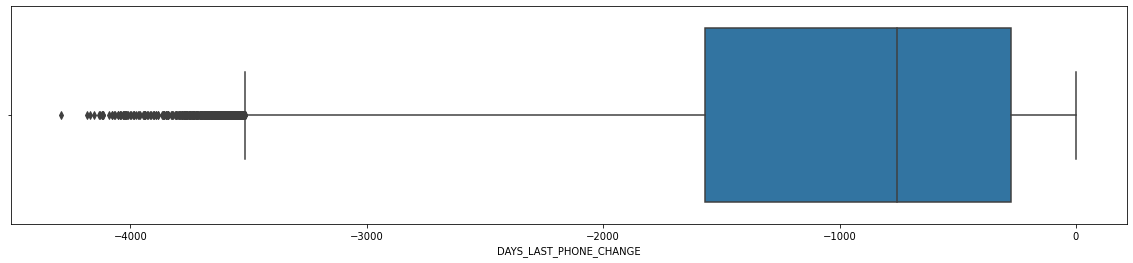

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [29]:
plt.figure(figsize=(20,4))
sns.boxplot(df_application.DAYS_LAST_PHONE_CHANGE)
plt.show()
df_application.DAYS_LAST_PHONE_CHANGE.describe()

#### Note: DAYS_LAST_PHONE_Change has outliers present in the data. Therefore, the missing data may be imputed with median value -757. <br> <br>

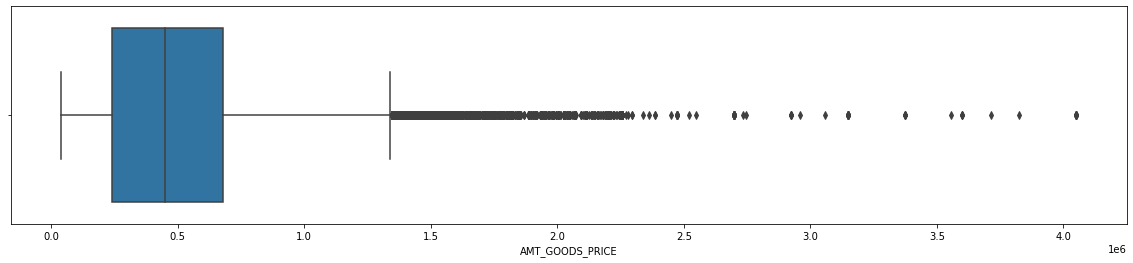

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [30]:
plt.figure(figsize=(20,4))
sns.boxplot(df_application.AMT_GOODS_PRICE)
plt.show()
df_application.AMT_GOODS_PRICE.describe()

#### Note: AMT_GOODS_PRICE has outliers present in the data. Therefore, the missing data may be imputed with median value 450000. <br> <br>

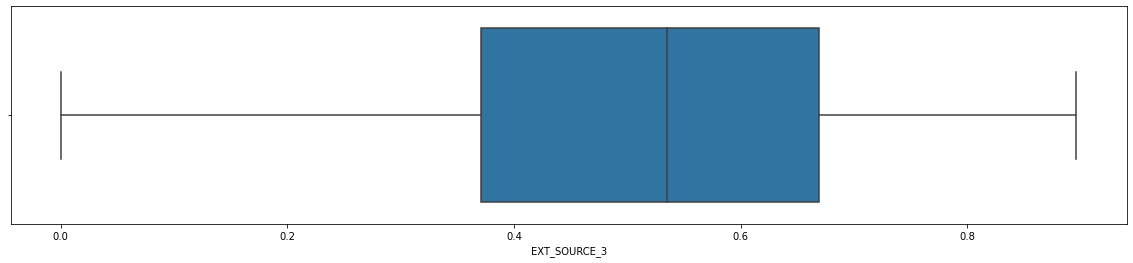

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [31]:
plt.figure(figsize=(20,4))
sns.boxplot(df_application.EXT_SOURCE_3)
plt.show()
df_application.EXT_SOURCE_3.describe()

#### Note: EXT_SOURCE_3 has no outliers present in the data. Therefore, the missing data may be imputed with mean value 0.510853. <br> <br>

### 6(b) Categorical variables (Imputation Approach):

In [32]:
#For Categorical variables, we will identify the value with maximum frequency in the relevant column by using mode.

print ('The following values may be used for imputing the missing values in the respective columns: \n')
print('OBS_30_CNT_SOCIAL_CIRCLE   : ', df_application.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0])
print('OBS_60_CNT_SOCIAL_CIRCLE   : ', df_application.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0])
print('AMT_REQ_CREDIT_BUREAU_YEAR : ', df_application.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0])
print('AMT_REQ_CREDIT_BUREAU_MON  : ', df_application.AMT_REQ_CREDIT_BUREAU_MON.mode()[0])
print('CNT_FAM_MEMBERS            : ', df_application.CNT_FAM_MEMBERS.mode()[0])
print('AMT_REQ_CREDIT_BUREAU_QRT  : ', df_application.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0])
print('DEF_30_CNT_SOCIAL_CIRCLE   : ', df_application.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0])
print('DEF_60_CNT_SOCIAL_CIRCLE   : ', df_application.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0])
print('AMT_REQ_CREDIT_BUREAU_DAY  : ', df_application.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0])
print('AMT_REQ_CREDIT_BUREAU_WEEK : ', df_application.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0])
print('NAME_TYPE_SUITE            : ', df_application.NAME_TYPE_SUITE.mode()[0])
print('AMT_REQ_CREDIT_BUREAU_HOUR : ', df_application.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0])

The following values may be used for imputing the missing values in the respective columns: 

OBS_30_CNT_SOCIAL_CIRCLE   :  0.0
OBS_60_CNT_SOCIAL_CIRCLE   :  0.0
AMT_REQ_CREDIT_BUREAU_YEAR :  0.0
AMT_REQ_CREDIT_BUREAU_MON  :  0.0
CNT_FAM_MEMBERS            :  2.0
AMT_REQ_CREDIT_BUREAU_QRT  :  0.0
DEF_30_CNT_SOCIAL_CIRCLE   :  0.0
DEF_60_CNT_SOCIAL_CIRCLE   :  0.0
AMT_REQ_CREDIT_BUREAU_DAY  :  0.0
AMT_REQ_CREDIT_BUREAU_WEEK :  0.0
NAME_TYPE_SUITE            :  Unaccompanied
AMT_REQ_CREDIT_BUREAU_HOUR :  0.0


### 6(c) Identification and dropping of unwanted columns post scrutinizing 'df_columns'

In [33]:
pd.set_option('display.max_columns', None) #To view all the columns in DataFrame
pd.set_option('display.max_rows', None)    #To view all the rows in DataFrame

df_columns

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [34]:
#Dropping irrelevant Columns from 'df_application'

df_application.drop(['REGION_RATING_CLIENT',
                     'REGION_POPULATION_RELATIVE',
                     'REGION_RATING_CLIENT_W_CITY',
                     'EXT_SOURCE_2',
                     'EXT_SOURCE_3',
                     'YEARS_BEGINEXPLUATATION_AVG',
                     'FLOORSMAX_AVG',
                     'YEARS_BEGINEXPLUATATION_MODE',
                     'FLOORSMAX_MODE',
                     'YEARS_BEGINEXPLUATATION_MEDI',
                     'FLOORSMAX_MEDI',
                     'TOTALAREA_MODE',
                     'EMERGENCYSTATE_MODE',
                     'FLAG_DOCUMENT_2',
                     'FLAG_DOCUMENT_3',
                     'FLAG_DOCUMENT_4',
                     'FLAG_DOCUMENT_5',
                     'FLAG_DOCUMENT_6',
                     'FLAG_DOCUMENT_7',
                     'FLAG_DOCUMENT_8',
                     'FLAG_DOCUMENT_9',
                     'FLAG_DOCUMENT_10',
                     'FLAG_DOCUMENT_11',
                     'FLAG_DOCUMENT_12',
                     'FLAG_DOCUMENT_13',
                     'FLAG_DOCUMENT_14',
                     'FLAG_DOCUMENT_15',
                     'FLAG_DOCUMENT_16',
                     'FLAG_DOCUMENT_17',
                     'FLAG_DOCUMENT_18',
                     'FLAG_DOCUMENT_19',
                     'FLAG_DOCUMENT_20',
                     'FLAG_DOCUMENT_21'],axis=1,inplace=True)

In [35]:
df_application.shape #To check the correctness of the drop operation

(307511, 48)

In [36]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6(d) Checking unique values in each Column in 'df_application' and imputing relevant values

In [37]:
#Checking Unique Values in each column in 'df_application'

for i in range (len(df_application.columns)):
    print(df_application.columns[i],df_application[df_application.columns[i]].unique())

SK_ID_CURR [100002 100003 100004 ... 456253 456254 456255]
TARGET [1 0]
NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans']
CODE_GENDER ['M' 'F' 'XNA']
FLAG_OWN_CAR ['N' 'Y']
FLAG_OWN_REALTY ['Y' 'N']
CNT_CHILDREN [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
AMT_INCOME_TOTAL [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
AMT_CREDIT [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
AMT_ANNUITY [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
AMT_GOODS_PRICE [ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
NAME_TYPE_SUITE ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS ['Single / not married' 'Married' 'Ci

#### Note: We observe a value 'XNA' in columns 'CODE_GENDER' and 'ORGANIZATION_TYPE'


In [38]:
#For column 'CODE_GENDER', counts of each value

print(df_application.CODE_GENDER.value_counts())

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


In [39]:
#Percentage of rows having 'XNA' as value in 'CODE_GENDER'

(df_application[df_application.CODE_GENDER=='XNA'].shape[0]/df_application.shape[0])*100

0.0013007664766463637

In [40]:
#Listing of rows with 'XNA' values in 'CODE_GENDER' column

df_application[df_application.CODE_GENDER=='XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,-20232,-10044,-10024.0,-3537,1,1,1,1,1,0,NaN,2.0,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,0.0,0.0,0.0,0.0,-286.0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,-13717,-2797,-2241.0,-4659,1,1,1,1,1,0,Low-skill Laborers,4.0,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,0.0,0.0,0.0,0.0,-493.0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,-10647,-1228,-183.0,-1671,1,1,1,1,1,0,Core staff,3.0,THURSDAY,15,0,0,0,0,0,0,Kindergarten,7.0,1.0,7.0,1.0,-851.0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,900000.0,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,-9649,-2293,-4099.0,-2326,1,1,1,1,1,0,NaN,2.0,FRIDAY,15,0,0,0,0,0,0,Medicine,10.0,4.0,10.0,4.0,-1681.0,0.0,0.0,0.0,0.0,1.0,6.0


#### Note: Since the percentage of rows having value 'XNA' in 'CODE_GENDER' column is 0.0013%, it is miniscule and therefore may be dropped.   

In [41]:
#Dropping rows with value 'XNA' in 'CODE_GENDER' column

df_application=df_application[~(df_application.CODE_GENDER=='XNA')]

In [42]:
#Checking for correct implementation of dropping of 'XNA' in 'CODE_GENDER' column

df_application[df_application.CODE_GENDER=='XNA'].shape[0]

0

In [43]:
#For column 'ORGANIZATION_TYPE', counts of each value

print(df_application.ORGANIZATION_TYPE.value_counts())

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [44]:
#Percentage of rows having 'XNA' as value in 'ORGANIZATION_TYPE'

(df_application[df_application.ORGANIZATION_TYPE=='XNA'].shape[0]/df_application.shape[0])*100

18.007394953610813

#### Note: Since the percentage of rows containing value 'XNA' in 'ORGANIZATION_TYPE' column is 18.007% which is quite high, it is recommended not to drop these rows. Instead it is better to replace these row values with NaN. <br> <br>

In [45]:
#Replacing value 'XNA' with NaN in 'ORGANIZATION_TYPE' column

df_application.loc[df_application.ORGANIZATION_TYPE=='XNA','ORGANIZATION_TYPE']=np.NaN

In [46]:
#Checking for correct implementation of replacing of 'XNA' in 'ORGANIZATION_TYPE' column

df_application[df_application.ORGANIZATION_TYPE=='XNA'].shape[0]

0

In [47]:
df_application.ORGANIZATION_TYPE.isna().sum()

55374

### 6(e) Checking Data Type of Each column and making relevant changes

In [48]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   NAME_CONTRACT_TYPE           307507 non-null  object 
 3   CODE_GENDER                  307507 non-null  object 
 4   FLAG_OWN_CAR                 307507 non-null  object 
 5   FLAG_OWN_REALTY              307507 non-null  object 
 6   CNT_CHILDREN                 307507 non-null  int64  
 7   AMT_INCOME_TOTAL             307507 non-null  float64
 8   AMT_CREDIT                   307507 non-null  float64
 9   AMT_ANNUITY                  307495 non-null  float64
 10  AMT_GOODS_PRICE              307229 non-null  float64
 11  NAME_TYPE_SUITE              306215 non-null  object 
 12  NAME_INCOME_TYPE             307507 non-null  object 
 13 

#### Note: 

    (a) The data types of respective columns are appropriately assigned.
    
    (b) The values of following columns are in float since they contain NaN values:-
    
                               'DAYS_REGISTRATION',
                               'CNT_FAM_MEMBERS', 
                               'OBS_30_CNT_SOCIAL_CIRCLE',
                               'DEF_30_CNT_SOCIAL_CIRCLE', 
                               'OBS_60_CNT_SOCIAL_CIRCLE',
                               'DEF_60_CNT_SOCIAL_CIRCLE',
                               'DAYS_LAST_PHONE_CHANGE',
                               'AMT_REQ_CREDIT_BUREAU_HOUR',
                               'AMT_REQ_CREDIT_BUREAU_DAY',
                               'AMT_REQ_CREDIT_BUREAU_WEEK',
                               'AMT_REQ_CREDIT_BUREAU_MON',
                               'AMT_REQ_CREDIT_BUREAU_QRT',
                               'AMT_REQ_CREDIT_BUREAU_YEAR'
                               
    (c) The values of few columns containing Days are given in Negative and need to be converted to positive values.

In [50]:
#Converting columns with day values in negative to positive values

df_application.DAYS_BIRTH=df_application.DAYS_BIRTH.abs()
df_application.DAYS_EMPLOYED=df_application.DAYS_EMPLOYED.abs()
df_application.DAYS_REGISTRATION=df_application.DAYS_REGISTRATION.abs()
df_application.DAYS_ID_PUBLISH=df_application.DAYS_ID_PUBLISH.abs()
df_application.DAYS_LAST_PHONE_CHANGE=df_application.DAYS_LAST_PHONE_CHANGE.abs()


In [51]:
#Checking the change of negative values to positive
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


## 7. Outliers

#### Note: The following are the objectives as per Problem Statement II

    (a) Identify if there are outliers in dataset.
    
    (b) Why do we think that it is an outlier?
    
    (c) For this exercise, it is not necessary to remove any data points.

### 7(a) Boxplot plotting for relevant numeric columns

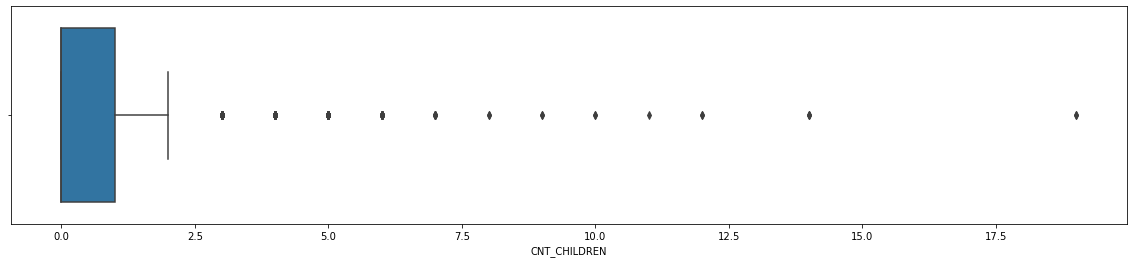

In [52]:
#Boxplot for 'CNT_CHILDREN' column

plt.figure(figsize=(20,4))
sns.boxplot(df_application.CNT_CHILDREN)
plt.show()

In [53]:
df_application.CNT_CHILDREN.describe()

count    307507.000000
mean          0.417047
std           0.722119
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

#### Note: The median of the data is at 0. The 75th percentile is at 1. Therefore, the values are mostly lying below 3rd quartile and hence values above upper fence may be considered outliers.

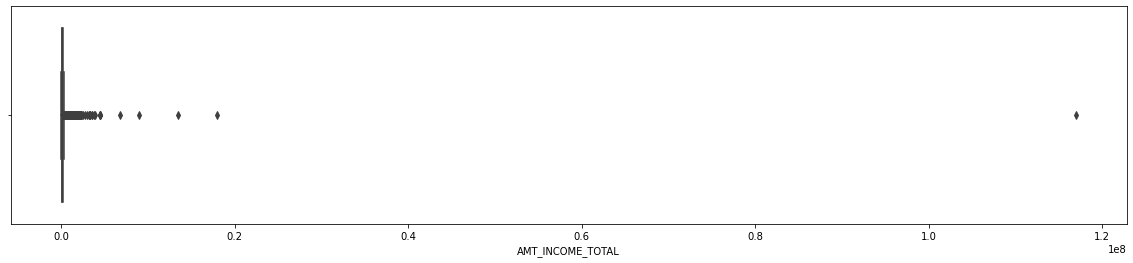

In [54]:
#Boxplot for 'AMT_INCOME_TOTAL' column

plt.figure(figsize=(20,4))
sns.boxplot(df_application.AMT_INCOME_TOTAL)
plt.show()

In [55]:
df_application.AMT_INCOME_TOTAL.describe()

count    3.075070e+05
mean     1.687977e+05
std      2.371246e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [56]:
#Analyzing Quantiles for 'AMT_INCOME_TOTAL'

df_application.AMT_INCOME_TOTAL.quantile([0.8, 0.85, 0.9, 0.95, 0.99])

0.80    225000.0
0.85    234000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

#### Note: The max value is three decades higher than the mean value and will have an impact on the remaining data. Therefore, it may be considered as an outlier. The remaining data till 99th percentile is continuous.

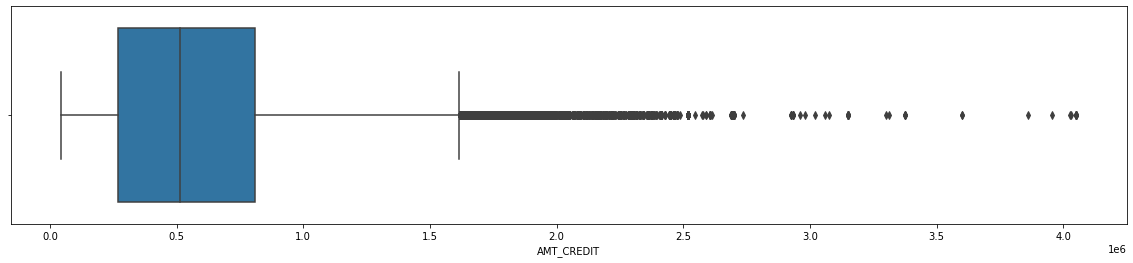

In [57]:
#Boxplot for 'AMT_CREDIT' column

plt.figure(figsize=(20,4))
sns.boxplot(df_application.AMT_CREDIT)
plt.show()

In [58]:
df_application.AMT_CREDIT.describe()

count    3.075070e+05
mean     5.990286e+05
std      4.024926e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [59]:
#Analyzing Quantiles for 'AMT_CREDIT'

df_application.AMT_CREDIT.quantile([0.8, 0.85, 0.9, 0.95, 0.99])

0.80     900000.0
0.85    1024740.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

#### Note: The max value is a decade higher than the mean value and may be considered as outlier. The remaining values till 90th percentile are continuous.

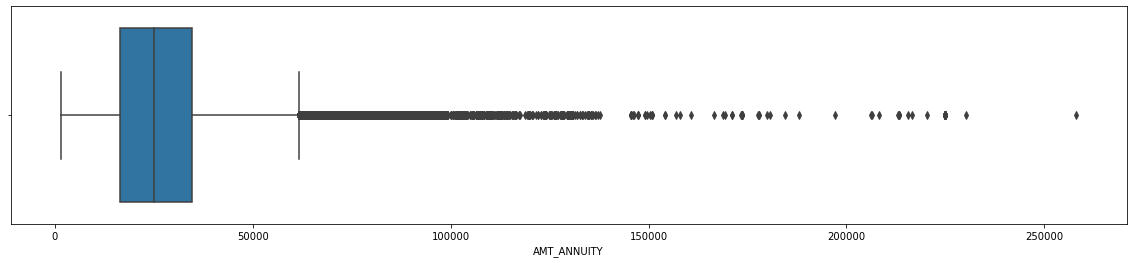

In [60]:
#Boxplot for 'AMT_ANNUITY' column

plt.figure(figsize=(20,4))
sns.boxplot(df_application.AMT_ANNUITY)
plt.show()

In [61]:
df_application.AMT_ANNUITY.describe()

count    307495.000000
mean      27108.666786
std       14493.798379
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [62]:
#Analyzing Quantiles for 'AMT_ANNUITY'

df_application.AMT_ANNUITY.quantile([0.8, 0.85, 0.9, 0.95, 0.99])

0.80    37516.5
0.85    40806.0
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

#### Note: The max value is a decade higher than the mean value and may be considered as outlier. The remaining values till 90th percentile are continuous.

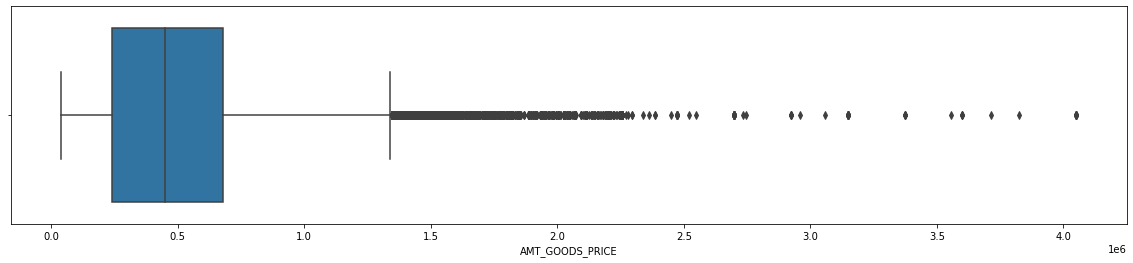

In [63]:
#Boxplot for 'AMT_GOODS_PRICE' column

plt.figure(figsize=(20,4))
sns.boxplot(df_application.AMT_GOODS_PRICE)
plt.show()

In [64]:
df_application.AMT_GOODS_PRICE.describe()

count    3.072290e+05
mean     5.383977e+05
std      3.694472e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [65]:
#Analyzing Quantiles for 'AMT_GOODS_PRICE'

df_application.AMT_ANNUITY.quantile([0.8, 0.85, 0.9, 0.95, 0.99])

0.80    37516.5
0.85    40806.0
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

#### Note:  The max value is a decade higher than the mean value and may be considered as outlier. The remaining values till 90th percentile are continuous.

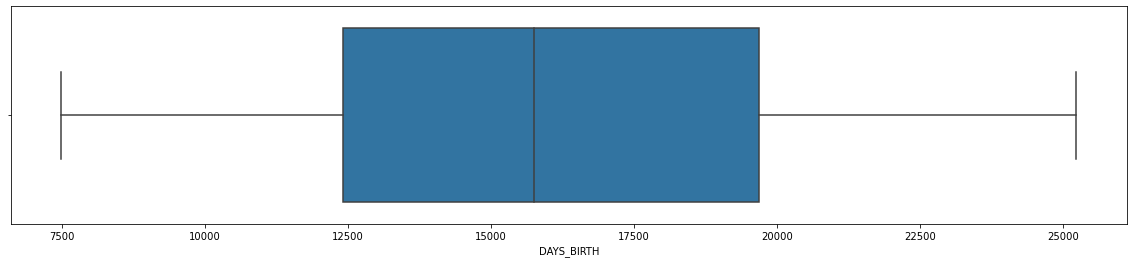

In [66]:
#Boxplot for 'DAYS_BIRTH' column

plt.figure(figsize=(20,4))
sns.boxplot(df_application.DAYS_BIRTH)
plt.show()

#### Note: There are no outliers in 'DAYS_BIRTH' column.

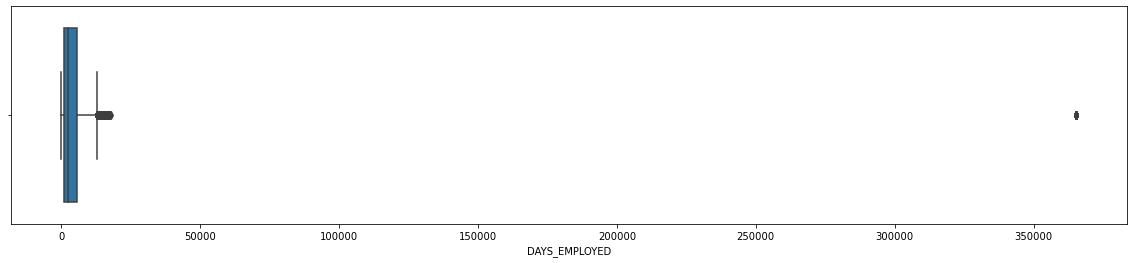

In [67]:
#Boxplot for 'DAYS_EMPLOYED' column

plt.figure(figsize=(20,4))
sns.boxplot(df_application.DAYS_EMPLOYED)
plt.show()

In [68]:
df_application.DAYS_EMPLOYED.describe()

count    307507.000000
mean      67725.569893
std      139444.469301
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [69]:
#Analyzing Quantiles for 'DAYS_EMPLOYED'

df_application.DAYS_EMPLOYED.quantile([0.8, 0.85, 0.9, 0.95, 0.99])

0.80      9188.0
0.85    365243.0
0.90    365243.0
0.95    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

#### Note: The max value is a decade higher than the mean value and may be considered as outlier. The remaining values till 80th percentile are continuous.

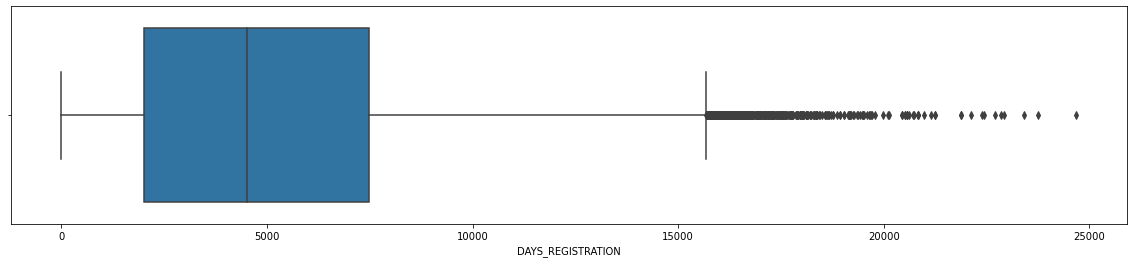

In [70]:
#Boxplot for 'DAYS_REGISTRATION' column

plt.figure(figsize=(20,4))
sns.boxplot(df_application.DAYS_REGISTRATION)
plt.show()

In [71]:
df_application.DAYS_REGISTRATION.describe()

count    307507.000000
mean       4986.131376
std        3522.883030
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [72]:
#Analyzing Quantiles for 'DAYS_REGISTRATION'

df_application.DAYS_REGISTRATION.quantile([0.8, 0.85, 0.9, 0.95, 0.99])

0.80     8230.0
0.85     9019.0
0.90     9932.0
0.95    11416.0
0.99    13879.0
Name: DAYS_REGISTRATION, dtype: float64

#### Note: The max value is a decade higher than the mean value and may be considered as outlier. The remaining values till 99th percentile are continuous.

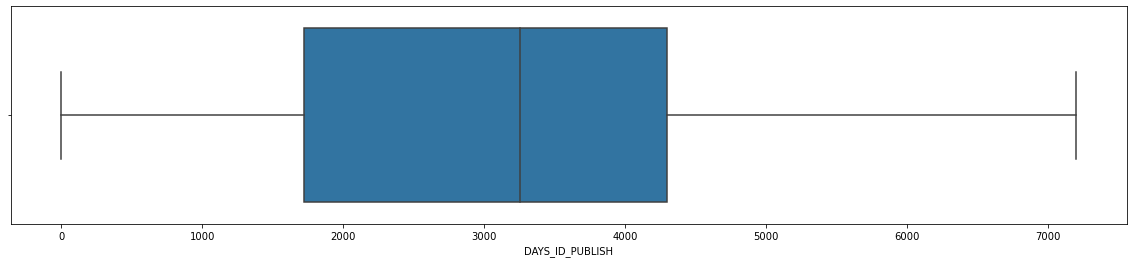

In [73]:
#Boxplot for 'DAYS_ID_PUBLISH' column

plt.figure(figsize=(20,4))
sns.boxplot(df_application.DAYS_ID_PUBLISH)
plt.show()

#### Note: There are no outliers in 'DAYS_ID_PUBLISH' column

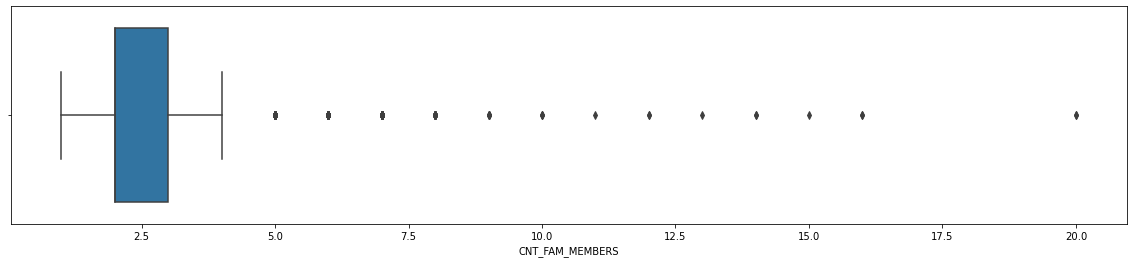

In [74]:
#Boxplot for 'CNT_FAM_MEMBERS' column

plt.figure(figsize=(20,4))
sns.boxplot(df_application.CNT_FAM_MEMBERS)
plt.show()

In [75]:
df_application.CNT_FAM_MEMBERS.describe()

count    307505.000000
mean          2.152658
std           0.910680
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

#### Note: The median of the data is at 2.0. The 75th percentile is at 3.0. Therefore, the values are mostly lying below 3rd quartile and hence values above upper fence may be considered outliers.

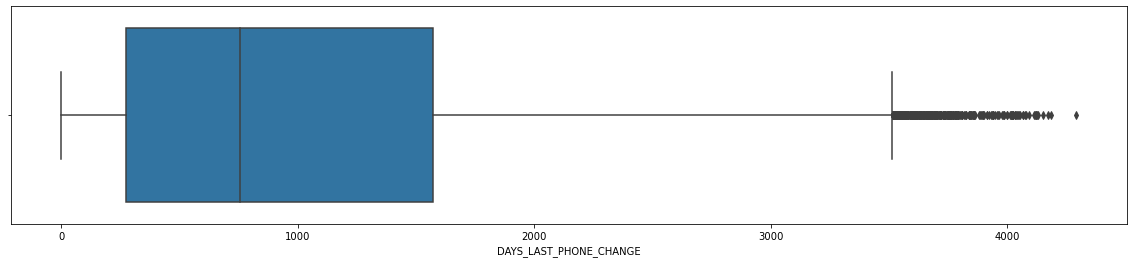

In [76]:
#Boxplot for 'DAYS_LAST_PHONE_CHANGE' column

plt.figure(figsize=(20,4))
sns.boxplot(df_application.DAYS_LAST_PHONE_CHANGE)
plt.show()

In [77]:
df_application.DAYS_LAST_PHONE_CHANGE.describe()

count    307506.000000
mean        962.860546
std         826.811491
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [78]:
#Analyzing Quantiles for 'DAYS_LAST_PHONE_CHANGE'

df_application.DAYS_LAST_PHONE_CHANGE.quantile([0.8, 0.85, 0.9, 0.95, 0.99])

0.80    1720.0
0.85    1887.0
0.90    2158.0
0.95    2522.0
0.99    3149.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

#### Note: The max value is a decade higher than the mean value and may be considered as outlier. The remaining values till 99th percentile are continuous.

## 8. Analysis


#### Note: The following are the objectives as per Problem Statement II

    (a) Identify if there is a data imbalance in data and find their ratio.
    
    (b) Explain results of univariate, segmented univariate and bivariate analysis in business terms.
    
    (c) Find top 10 correlation for Client with payment difficulties and all other variables.

In [79]:
#Value counts of values in 'TARGET' column

df_application.TARGET.value_counts()

0    282682
1     24825
Name: TARGET, dtype: int64

In [80]:
#We can divide dataframe into two parts: 'df_defaulters' where 'TARGET' values =1 (Client facing payment difficulties) and 'df_nondefaulters' where 'TARGET' values = 0 (Other Clients)

df_defaulters= df_application[df_application.TARGET==1]
df_nondefaulters=df_application[df_application.TARGET==0]

In [81]:
#Checking correctness of above operation

df_defaulters.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,18724,2628,6573.0,1827,1,1,0,1,0,0,Cooking staff,1.0,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,10.0,1.0,10.0,0.0,161.0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,17482,1262,1182.0,1029,1,1,0,1,0,0,Laborers,2.0,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,13384,3597,45.0,4409,1,1,1,1,1,0,Sales staff,2.0,THURSDAY,11,0,0,0,0,0,0,Self-employed,1.0,0.0,1.0,0.0,1480.0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,24794,365243,5391.0,4199,1,0,0,1,0,0,NaN,2.0,THURSDAY,10,0,0,0,0,0,0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
df_nondefaulters.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,16941,1588,4970.0,477,1,1,1,1,1,0,Laborers,2.0,WEDNESDAY,16,0,0,0,0,0,0,Other,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0


In [83]:
#Calculation of Percentage of Defaulters Vs Non-Defaulters

percentage_defaulters = 100*(len(df_defaulters)/df_application.shape[0])
percentage_nondefaulters = 100*(len(df_nondefaulters)/df_application.shape[0])

### 8(a)(i) Defaulters Vs Non-Defaulters

In [84]:
#Analysis of Defaulters Vs Non-Defaulters

print('Number of Non-Defaulters is     : ',len(df_nondefaulters))
print('Number of Defaulters is         : ', len(df_defaulters))
print('Percentage of Non-Defaulters is : ', round(percentage_nondefaulters,2),'%')
print('Percentage of Defaulters is     : ', round(percentage_defaulters,2),'%')

Number of Non-Defaulters is     :  282682
Number of Defaulters is         :  24825
Percentage of Non-Defaulters is :  91.93 %
Percentage of Defaulters is     :  8.07 %


### 8(a)(ii) Imbalance Ratio

#### Note: What is Data imbalance?

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

In [85]:
#Calculation of Imbalance Ratio

imbalance_ratio=round(len(df_nondefaulters)/len(df_defaulters),2)
print('Imbalance Ratio is : ', imbalance_ratio)

Imbalance Ratio is :  11.39


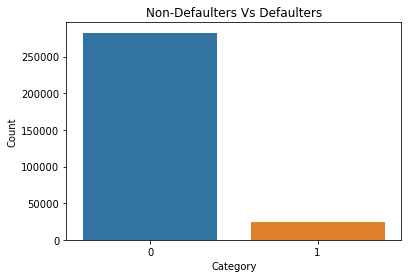

In [86]:
# Visualisation for Non-defaulters Vs Defaulters

sns.countplot(x='TARGET',data=df_application)
plt.title('Non-Defaulters Vs Defaulters')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

### 8(b)(i) Segmented Univariate Analysis

#### Note: We will define a function to undertake the plotting and analysis of segmeneted univariate variable

In [87]:
#Function for drawing graphs of a variable with FLAG values for segmented univariate analysis

def analysis_graph_flag(df):
    plt.figure(figsize=(10,5))
    sns.countplot(x=df,hue='TARGET',data=df_application)
    plt.title(df)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

In [88]:
#Making list of variables for segmented univariate analytical criteria

list_segmented_univarite=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']


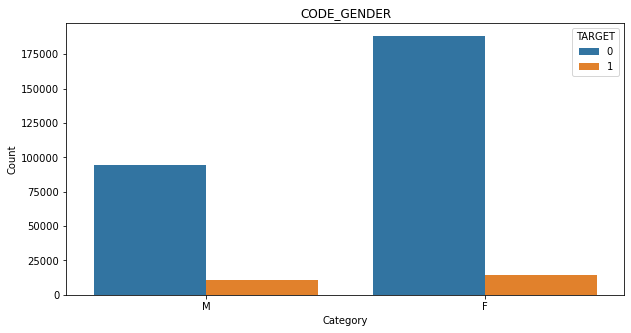

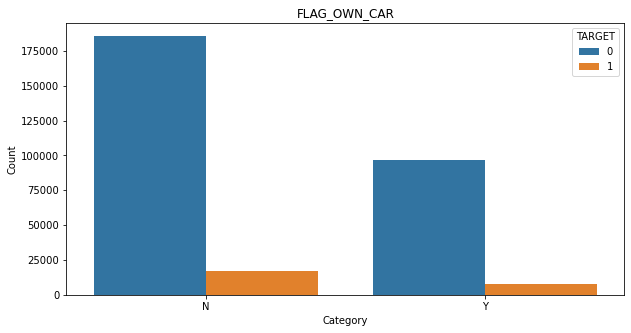

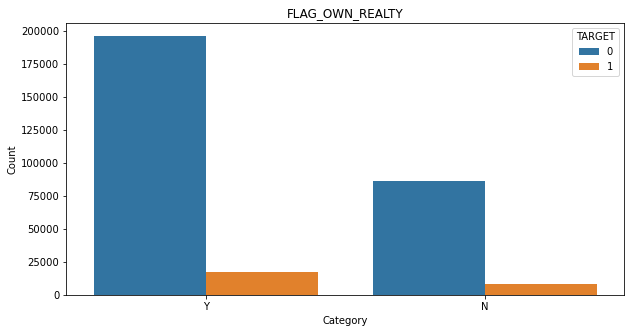

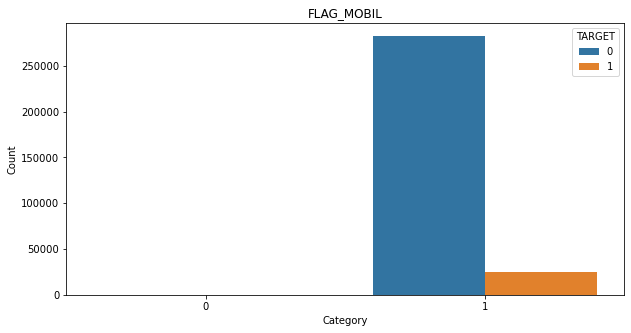

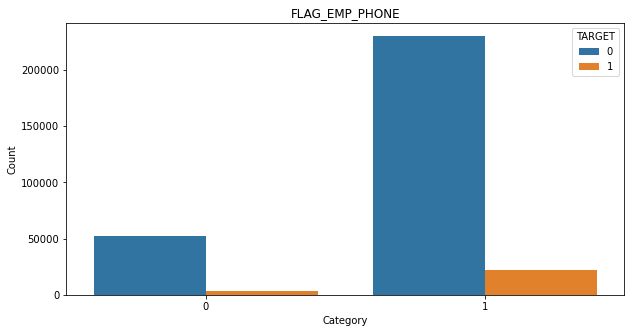

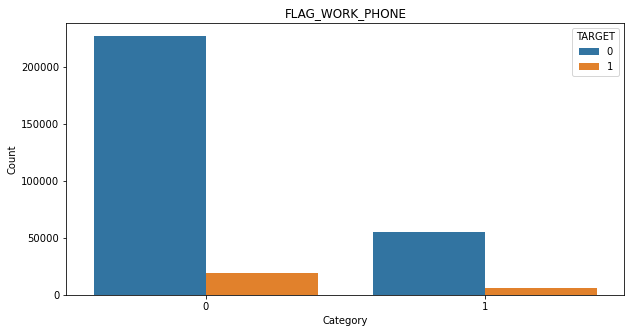

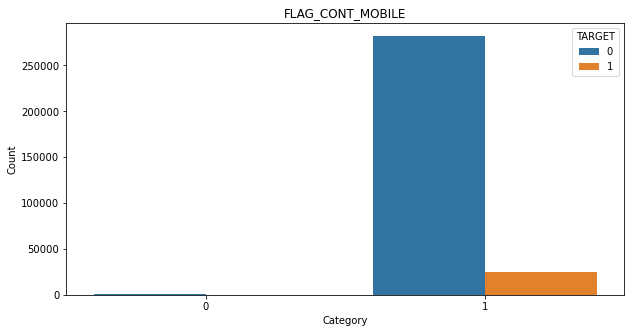

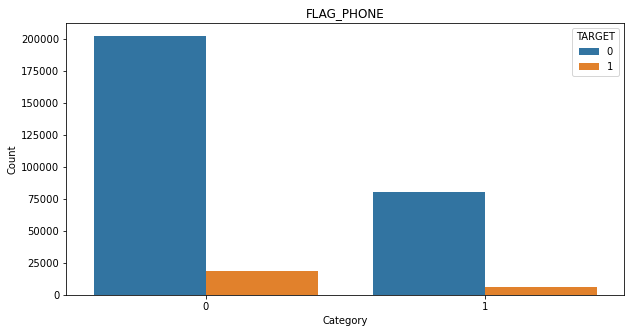

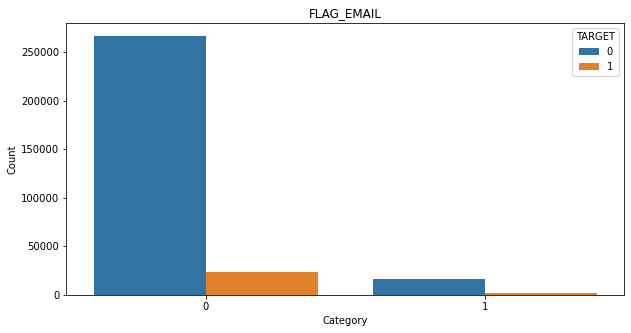

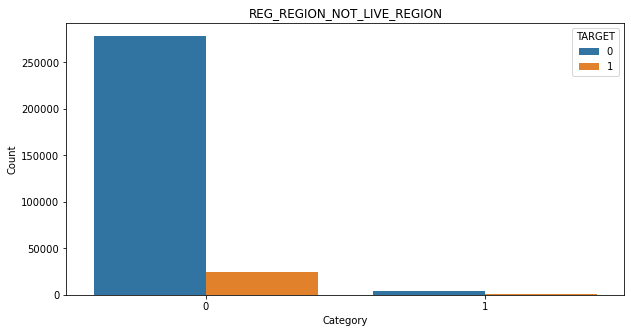

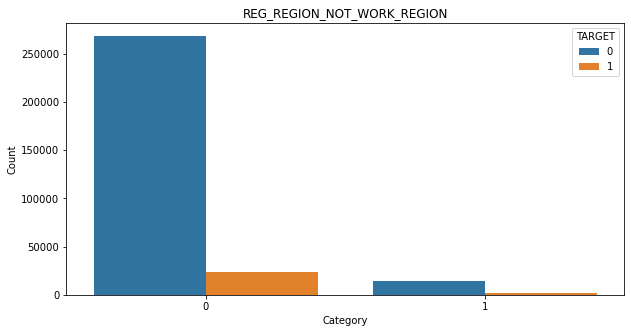

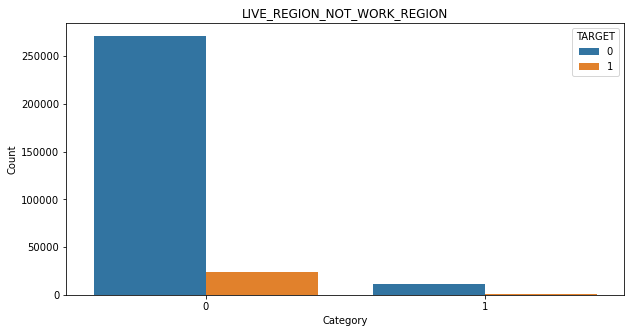

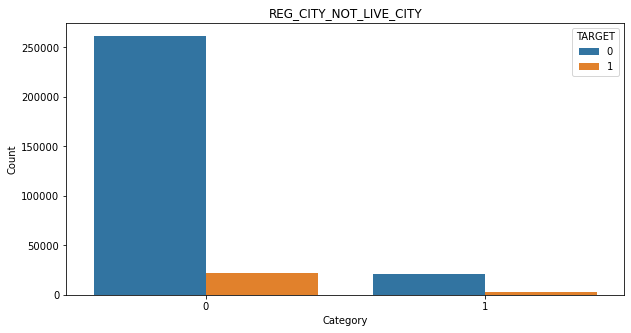

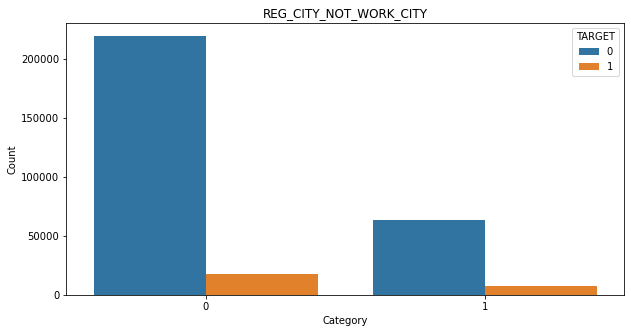

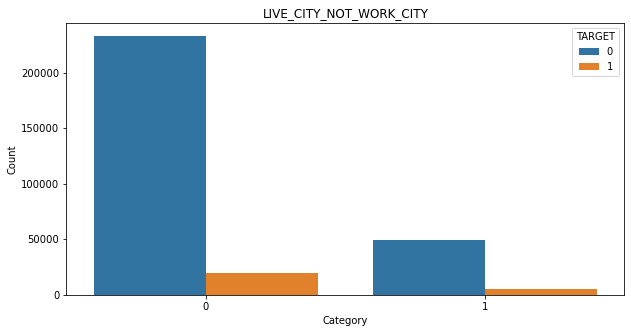

In [89]:
#Graphs for list_segmented_univarite

for i in range (len(list_segmented_univarite)):
    analysis_graph_flag(list_segmented_univarite[i])

In [90]:
#Function for Calculation for Analysis of Segmented Univariate variables
def defaulter_parameters(df):
    print('Total number of rows        : ', len(df))
    print('Number of defaulters        : ', df.TARGET.sum())
    print('Percentage of defaulters    : ', round((df.TARGET.sum()/len(df))*100.0,2), '\n')

In [91]:
#Analysis for 'CODE_GENDER'

print('Male Defaulters')
defaulter_parameters(df_application[df_application.CODE_GENDER=='M'])

print('Female Defaulters')
defaulter_parameters(df_application[df_application.CODE_GENDER=='F'])

Male Defaulters
Total number of rows        :  105059
Number of defaulters        :  10655
Percentage of defaulters    :  10.14 

Female Defaulters
Total number of rows        :  202448
Number of defaulters        :  14170
Percentage of defaulters    :  7.0 



#### Insight: The percentage of male defaulters is higher i.e. 10.14% Vs female defaulters which is 7.0% . <br>

In [92]:
#Analysis for 'FLAG_OWN_CAR'

print('Car owners')
defaulter_parameters(df_application[df_application.FLAG_OWN_CAR=='Y'])

print('Non-Car owners')
defaulter_parameters(df_application[df_application.FLAG_OWN_CAR=='N'])

Car owners
Total number of rows        :  104585
Number of defaulters        :  7576
Percentage of defaulters    :  7.24 

Non-Car owners
Total number of rows        :  202922
Number of defaulters        :  17249
Percentage of defaulters    :  8.5 



#### Insight: Car owners are less susceptible to default than non-car owners. <br>

In [93]:
#Analysis for 'FLAG_OWN_REALTY'

print('Realty owners')
defaulter_parameters(df_application[df_application.FLAG_OWN_REALTY=='Y'])

print('Non-Realty owners')
defaulter_parameters(df_application[df_application.FLAG_OWN_REALTY=='N'])

Realty owners
Total number of rows        :  213308
Number of defaulters        :  16983
Percentage of defaulters    :  7.96 

Non-Realty owners
Total number of rows        :  94199
Number of defaulters        :  7842
Percentage of defaulters    :  8.32 



#### Insight: Realty owners are slightly less susceptible to default than non-realty owners. <br>

In [94]:
#Analysis for 'FLAG_MOBIL'

print('Mobile Number Provider')
defaulter_parameters(df_application[df_application.FLAG_MOBIL==1])

print('Non-Mobile Number Provider')
defaulter_parameters(df_application[df_application.FLAG_MOBIL==0])

Mobile Number Provider
Total number of rows        :  307506
Number of defaulters        :  24825
Percentage of defaulters    :  8.07 

Non-Mobile Number Provider
Total number of rows        :  1
Number of defaulters        :  0
Percentage of defaulters    :  0.0 



#### Insight: All customers except for one provided their mobile number. <br>

In [95]:
#Analysis for 'FLAG_EMP_PHONE'

print('Clients which provided home phone')
defaulter_parameters(df_application[df_application.FLAG_EMP_PHONE==1])

print('Clients which did not provide home phone')
defaulter_parameters(df_application[df_application.FLAG_EMP_PHONE==0])

Clients which provided home phone
Total number of rows        :  252121
Number of defaulters        :  21834
Percentage of defaulters    :  8.66 

Clients which did not provide home phone
Total number of rows        :  55386
Number of defaulters        :  2991
Percentage of defaulters    :  5.4 



#### Insight: Majority of personnel provided their home phone number. <br> 

In [96]:
#Analysis for 'FLAG_WORK_PHONE'

print('Clients which provided work phone')
defaulter_parameters(df_application[df_application.FLAG_WORK_PHONE==1])

print('Clients which did not provide work phone')
defaulter_parameters(df_application[df_application.FLAG_WORK_PHONE==0])

Clients which provided work phone
Total number of rows        :  61304
Number of defaulters        :  5904
Percentage of defaulters    :  9.63 

Clients which did not provide work phone
Total number of rows        :  246203
Number of defaulters        :  18921
Percentage of defaulters    :  7.69 



#### Insight: Majority of personnel did not provide their work phone details. <br>

In [97]:
#Analysis for 'FLAG_CONT_MOBILE'

print('Clients who were reachable on Mobile phone')
defaulter_parameters(df_application[df_application.FLAG_CONT_MOBILE==1])

print('Clients who were not reachable on Mobile phone')
defaulter_parameters(df_application[df_application.FLAG_CONT_MOBILE==0])

Clients who were reachable on Mobile phone
Total number of rows        :  306933
Number of defaulters        :  24780
Percentage of defaulters    :  8.07 

Clients who were not reachable on Mobile phone
Total number of rows        :  574
Number of defaulters        :  45
Percentage of defaulters    :  7.84 



#### Insight: Majority of personnel were reachable on mobile phone. <br>

In [98]:
#Analysis for 'FLAG_PHONE'

print('Clients who provided their home phone')
defaulter_parameters(df_application[df_application.FLAG_PHONE==1])

print('Clients who did not provide their home phone')
defaulter_parameters(df_application[df_application.FLAG_PHONE==0])

Clients who provided their home phone
Total number of rows        :  86427
Number of defaulters        :  6081
Percentage of defaulters    :  7.04 

Clients who did not provide their home phone
Total number of rows        :  221080
Number of defaulters        :  18744
Percentage of defaulters    :  8.48 



#### Insight: A majority of clients did not provide their home phone. Percentage of defaulters were higher for clients who did not provide their home phone number . <br>

In [99]:
#Analysis for 'FLAG_EMAIL'

print('Clients who provided their e-mail')
defaulter_parameters(df_application[df_application.FLAG_EMAIL==1])

print('Clients who did not provide their e-mail')
defaulter_parameters(df_application[df_application.FLAG_EMAIL==0])

Clients who provided their e-mail
Total number of rows        :  17442
Number of defaulters        :  1374
Percentage of defaulters    :  7.88 

Clients who did not provide their e-mail
Total number of rows        :  290065
Number of defaulters        :  23451
Percentage of defaulters    :  8.08 



#### Insight: A majority of clients did not provide their email ids. <br>

In [100]:
#Analysis for 'REG_REGION_NOT_LIVE_REGION'

print('Clients whose permanent address did not match contact address')
defaulter_parameters(df_application[df_application.REG_REGION_NOT_LIVE_REGION==1])

print('Clients whose permanent address matched contact address')
defaulter_parameters(df_application[df_application.REG_REGION_NOT_LIVE_REGION==0])

Clients whose permanent address did not match contact address
Total number of rows        :  4657
Number of defaulters        :  433
Percentage of defaulters    :  9.3 

Clients whose permanent address matched contact address
Total number of rows        :  302850
Number of defaulters        :  24392
Percentage of defaulters    :  8.05 



#### Insight: Majority of the client's permanent address matched contact address. The percentage of defaulters were higher for clients whose permanent address did not match contact address. <br>

In [101]:
#Analysis for 'REG_REGION_NOT_WORK_REGION'

print('Clients whose permanent address did not match work address')
defaulter_parameters(df_application[df_application.REG_REGION_NOT_WORK_REGION==1])

print('Clients whose permanent address matched work address')
defaulter_parameters(df_application[df_application.REG_REGION_NOT_WORK_REGION==0])

Clients whose permanent address did not match work address
Total number of rows        :  15612
Number of defaulters        :  1388
Percentage of defaulters    :  8.89 

Clients whose permanent address matched work address
Total number of rows        :  291895
Number of defaulters        :  23437
Percentage of defaulters    :  8.03 



#### Insight: Majority of the client's permanent address matched work address. The percentage of defaulters were marginally higher for clients whose permanent address did not match work address. <br>

In [102]:
#Analysis for 'LIVE_REGION_NOT_WORK_REGION'

print('Clients whose contact address did not match work address')
defaulter_parameters(df_application[df_application.LIVE_REGION_NOT_WORK_REGION==1])

print('Clients whose contact address matched work address')
defaulter_parameters(df_application[df_application.LIVE_REGION_NOT_WORK_REGION==0])

Clients whose contact address did not match work address
Total number of rows        :  12503
Number of defaulters        :  1056
Percentage of defaulters    :  8.45 

Clients whose contact address matched work address
Total number of rows        :  295004
Number of defaulters        :  23769
Percentage of defaulters    :  8.06 



#### Insight: Majority of the client's contact address matched work address. The percentage of defaulters were marginally higher for clients whose contact address did not match work address. <br>

In [103]:
#Analysis for 'REG_CITY_NOT_LIVE_CITY'

print('Clients whose permanent address did not match contact address')
defaulter_parameters(df_application[df_application.REG_CITY_NOT_LIVE_CITY==1])

print('Clients whose permanent address matched contact address')
defaulter_parameters(df_application[df_application.REG_CITY_NOT_LIVE_CITY==0])

Clients whose permanent address did not match contact address
Total number of rows        :  24039
Number of defaulters        :  2939
Percentage of defaulters    :  12.23 

Clients whose permanent address matched contact address
Total number of rows        :  283468
Number of defaulters        :  21886
Percentage of defaulters    :  7.72 



#### Insight: Majority of the client's contact address matched work address. The percentage of defaulters were substantially higher for clients whose permanent address did not match contact address. <br>

In [104]:
#Analysis for 'REG_CITY_NOT_WORK_CITY'

print('Clients whose permanent address did not match work address')
defaulter_parameters(df_application[df_application.REG_CITY_NOT_WORK_CITY==1])

print('Clients whose permanent address matched work address')
defaulter_parameters(df_application[df_application.REG_CITY_NOT_WORK_CITY==0])

Clients whose permanent address did not match work address
Total number of rows        :  70867
Number of defaulters        :  7520
Percentage of defaulters    :  10.61 

Clients whose permanent address matched work address
Total number of rows        :  236640
Number of defaulters        :  17305
Percentage of defaulters    :  7.31 



#### Insight: Majority of the client's permanent address matched work address. The percentage of defaulters were substantially higher for clients whose permanent address did not match work address. <br>

In [105]:
#Analysis for 'LIVE_CITY_NOT_WORK_CITY'

print('Clients whose contact address did not match work address')
defaulter_parameters(df_application[df_application.LIVE_CITY_NOT_WORK_CITY==1])

print('Clients whose contact address matched work address')
defaulter_parameters(df_application[df_application.LIVE_CITY_NOT_WORK_CITY==0])

Clients whose contact address did not match work address
Total number of rows        :  55215
Number of defaulters        :  5503
Percentage of defaulters    :  9.97 

Clients whose contact address matched work address
Total number of rows        :  252292
Number of defaulters        :  19322
Percentage of defaulters    :  7.66 



#### Insight: Majority of the client's contact address matched work address. The percentage of defaulters were substantially higher for clients whose contact address did not match work address.

### 8(b)(ii) Univariate Analysis 

#### Note: For continuous variables, we need to construct bins for better analysis

In [106]:
#Checking for range of values in 'AMT_INCOME_TOTAL'

df_application.AMT_INCOME_TOTAL.describe()

count    3.075070e+05
mean     1.687977e+05
std      2.371246e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [107]:
#Creating new Range column in df_application for 'AMT_INCOME_TOTAL'

df_application['AMT_INCOME_TOTAL_RANGE']=pd.cut(df_application.AMT_INCOME_TOTAL,bins=[0,100000,200000,300000,400000,500000,9999999999],labels=['<100000','100000-200000','200000-300000','300000-400000','400000-500000','>500000'])

In [108]:
#Checking results of 'AMT_INCOME_TOTAL_RANGE' Column
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-300000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,200000-300000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,<100000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-200000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-200000


In [109]:
#Checking for range of values in 'AMT_CREDIT'

df_application.AMT_CREDIT.describe()

count    3.075070e+05
mean     5.990286e+05
std      4.024926e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [110]:
#Creating new Range column in df_application for 'AMT_CREDIT'

df_application['AMT_CREDIT_RANGE']=pd.cut(df_application.AMT_CREDIT,bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,9999999999],labels=['<100000','100000-200000','200000-300000','300000-400000','400000-500000','500000-600000','600000-700000','700000-800000','800000-900000','>900000'])

In [111]:
#Checking results of 'AMT_CREDIT_RANGE' Column
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-300000,400000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,200000-300000,>900000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,<100000,100000-200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-200000,300000-400000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-200000,500000-600000


In [112]:
#Checking for range of values in 'AMT_ANNUITY'

df_application.AMT_ANNUITY.describe()

count    307495.000000
mean      27108.666786
std       14493.798379
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [113]:
#Creating new Range column in df_application for 'AMT_ANNUITY_RANGE'

df_application['AMT_ANNUITY_RANGE']=pd.cut(df_application.AMT_ANNUITY,bins=[0,10000,20000,30000,40000,9999999999],labels=['<10000','10000-20000','20000-30000','30000-40000','>40000'])

In [114]:
#Checking for range of values in 'AMT_ANNUITY_RANGE'

df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-300000,400000-500000,20000-30000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,200000-300000,>900000,30000-40000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,<100000,100000-200000,<10000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-200000,300000-400000,20000-30000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-200000,500000-600000,20000-30000


In [115]:
#Checking for range of values in 'AMT_GOODS_PRICE'

df_application.AMT_GOODS_PRICE.describe()

count    3.072290e+05
mean     5.383977e+05
std      3.694472e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [116]:
#Creating new Range column in df_application for 'AMT_GOODS_PRICE_RANGE'

df_application['AMT_GOODS_PRICE_RANGE']=pd.cut(df_application.AMT_GOODS_PRICE,bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,9999999999],labels=['<100000','100000-200000','200000-300000','300000-400000','400000-500000','500000-600000','600000-700000','700000-800000','800000-900000','>900000'])

In [117]:
#Checking for range of values in 'AMT_GOODS_PRICE_RANGE'

df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_PRICE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-300000,400000-500000,20000-30000,300000-400000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,200000-300000,>900000,30000-40000,>900000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,<100000,100000-200000,<10000,100000-200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-200000,300000-400000,20000-30000,200000-300000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-200000,500000-600000,20000-30000,500000-600000


In [118]:
list_univariate=['CNT_CHILDREN','AMT_INCOME_TOTAL_RANGE','AMT_CREDIT_RANGE','AMT_ANNUITY_RANGE','AMT_GOODS_PRICE_RANGE','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START']

In [119]:
#Function for drawing graphs of a variable with range values

def analyze_graph_range(df):
    plt.figure(figsize=(10,5))
    sns.countplot(x=df, hue='TARGET',data=df_application)
    plt.title(df)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

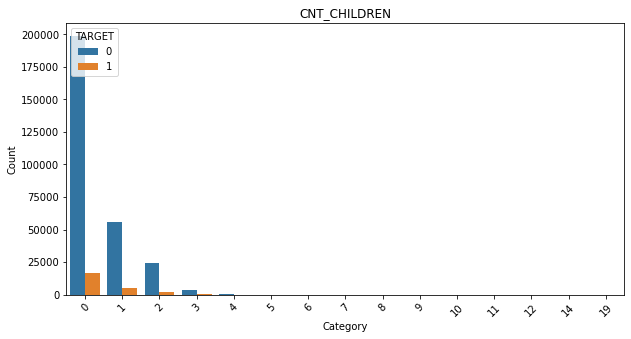

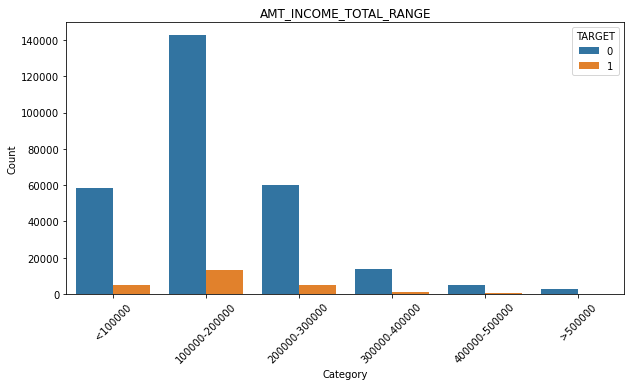

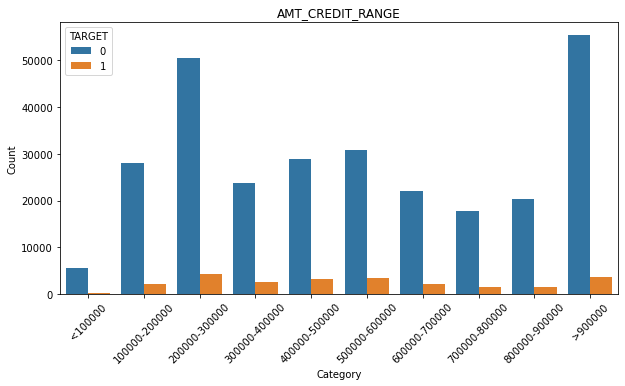

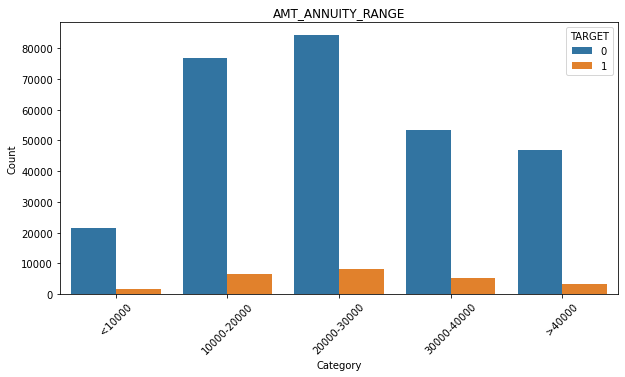

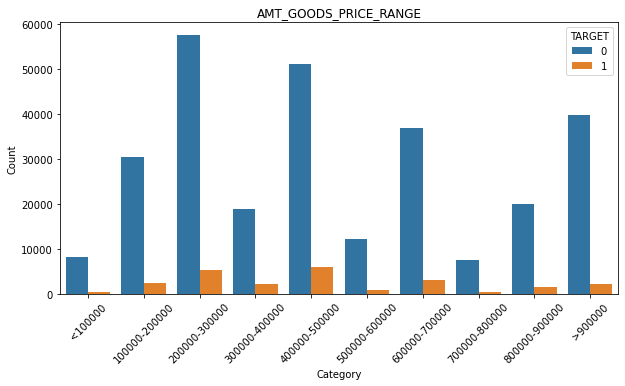

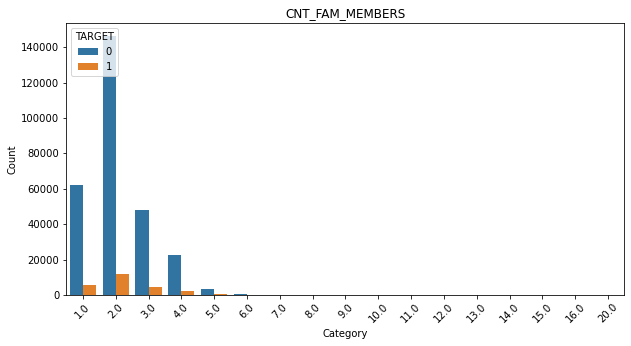

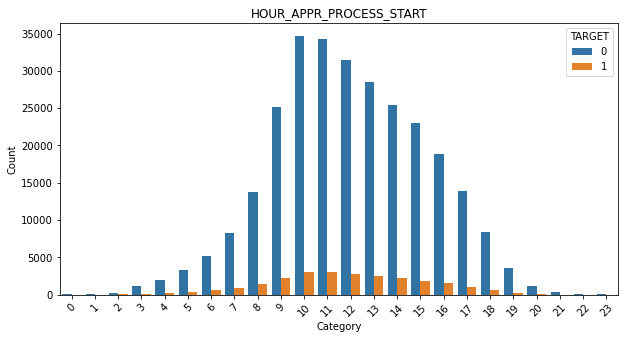

In [120]:
#Graphs for list_univariate

for i in range (len(list_univariate)):
    analyze_graph_range(list_univariate[i])

In [121]:
#Analysis for 'CNT_CHILDREN'

for i in range (5):
    print('Clients with', i, 'children')
    defaulter_parameters(df_application[df_application.CNT_CHILDREN==i])

Clients with 0 children
Total number of rows        :  215369
Number of defaulters        :  16609
Percentage of defaulters    :  7.71 

Clients with 1 children
Total number of rows        :  61118
Number of defaulters        :  5454
Percentage of defaulters    :  8.92 

Clients with 2 children
Total number of rows        :  26748
Number of defaulters        :  2333
Percentage of defaulters    :  8.72 

Clients with 3 children
Total number of rows        :  3717
Number of defaulters        :  358
Percentage of defaulters    :  9.63 

Clients with 4 children
Total number of rows        :  429
Number of defaulters        :  55
Percentage of defaulters    :  12.82 



#### Insight: The percentage of defaulters tends to increase with number of children of the client. <br>

In [122]:
#Analysis for 'AMT_INCOME_TOTAL_RANGE'

for i in enumerate (['<100000','100000-200000','200000-300000','300000-400000','400000-500000','>500000']):
    print('Clients with', i[1], 'income')
    defaulter_parameters(df_application[df_application.AMT_INCOME_TOTAL_RANGE==i[1]])

Clients with <100000 income
Total number of rows        :  63698
Number of defaulters        :  5225
Percentage of defaulters    :  8.2 

Clients with 100000-200000 income
Total number of rows        :  155896
Number of defaulters        :  13326
Percentage of defaulters    :  8.55 

Clients with 200000-300000 income
Total number of rows        :  65174
Number of defaulters        :  4921
Percentage of defaulters    :  7.55 

Clients with 300000-400000 income
Total number of rows        :  14676
Number of defaulters        :  885
Percentage of defaulters    :  6.03 

Clients with 400000-500000 income
Total number of rows        :  5361
Number of defaulters        :  322
Percentage of defaulters    :  6.01 

Clients with >500000 income
Total number of rows        :  2702
Number of defaulters        :  146
Percentage of defaulters    :  5.4 



#### Insight: The percentage of defaulters tends to decrease with increase in income of the client. <br>
                                                                                                      

In [123]:
#Analysis for 'AMT_CREDIT_RANGE'

for i in enumerate (['<100000','100000-200000','200000-300000','300000-400000','400000-500000','500000-600000','600000-700000','700000-800000','800000-900000','>900000']):
    print('Clients with', i[1], 'credit amount of loan')
    defaulter_parameters(df_application[df_application.AMT_CREDIT_RANGE==i[1]])

Clients with <100000 credit amount of loan
Total number of rows        :  6004
Number of defaulters        :  331
Percentage of defaulters    :  5.51 

Clients with 100000-200000 credit amount of loan
Total number of rows        :  30140
Number of defaulters        :  2159
Percentage of defaulters    :  7.16 

Clients with 200000-300000 credit amount of loan
Total number of rows        :  54812
Number of defaulters        :  4321
Percentage of defaulters    :  7.88 

Clients with 300000-400000 credit amount of loan
Total number of rows        :  26337
Number of defaulters        :  2623
Percentage of defaulters    :  9.96 

Clients with 400000-500000 credit amount of loan
Total number of rows        :  32037
Number of defaulters        :  3171
Percentage of defaulters    :  9.9 

Clients with 500000-600000 credit amount of loan
Total number of rows        :  34231
Number of defaulters        :  3523
Percentage of defaulters    :  10.29 

Clients with 600000-700000 credit amount of loan

#### Insight: The percentage of defaulters increases with credit amount of loan upto 500000-600000 range and then decreases thereafter. <br>

In [124]:
#Analysis for 'AMT_ANNUITY_RANGE'

for i in enumerate (['<10000','10000-20000','20000-30000','30000-40000','>40000']):
    print('Clients with', i[1], 'loan annuity')
    defaulter_parameters(df_application[df_application.AMT_ANNUITY_RANGE==i[1]])

Clients with <10000 loan annuity
Total number of rows        :  23283
Number of defaulters        :  1650
Percentage of defaulters    :  7.09 

Clients with 10000-20000 loan annuity
Total number of rows        :  83220
Number of defaulters        :  6434
Percentage of defaulters    :  7.73 

Clients with 20000-30000 loan annuity
Total number of rows        :  92464
Number of defaulters        :  8258
Percentage of defaulters    :  8.93 

Clients with 30000-40000 loan annuity
Total number of rows        :  58562
Number of defaulters        :  5251
Percentage of defaulters    :  8.97 

Clients with >40000 loan annuity
Total number of rows        :  49966
Number of defaulters        :  3232
Percentage of defaulters    :  6.47 



#### Insight: The percentage of defaulters increases with loan annuity upto 30000-40000 range and then decreases thereafter. <br>

In [125]:
#Analysis for 'AMT_GOODS_PRICE_RANGE'

for i in enumerate (['<100000','100000-200000','200000-300000','300000-400000','400000-500000','500000-600000','600000-700000','700000-800000','800000-900000','>900000']):
    print('Clients with loan for goods worth', i[1])
    defaulter_parameters(df_application[df_application.AMT_GOODS_PRICE_RANGE==i[1]])

Clients with loan for goods worth <100000
Total number of rows        :  8709
Number of defaulters        :  526
Percentage of defaulters    :  6.04 

Clients with loan for goods worth 100000-200000
Total number of rows        :  32956
Number of defaulters        :  2534
Percentage of defaulters    :  7.69 

Clients with loan for goods worth 200000-300000
Total number of rows        :  62759
Number of defaulters        :  5283
Percentage of defaulters    :  8.42 

Clients with loan for goods worth 300000-400000
Total number of rows        :  21218
Number of defaulters        :  2230
Percentage of defaulters    :  10.51 

Clients with loan for goods worth 400000-500000
Total number of rows        :  56973
Number of defaulters        :  5902
Percentage of defaulters    :  10.36 

Clients with loan for goods worth 500000-600000
Total number of rows        :  13117
Number of defaulters        :  978
Percentage of defaulters    :  7.46 

Clients with loan for goods worth 600000-700000
Total

#### Insight: The percentage of defaulters increases for clients with loan for goods worth  300000-400000 range and then decreases thereafter. <br>

In [126]:
#Analysis for 'CNT_FAM_MEMBERS'

for i in range (1,7):
    print('Clients with', i, 'family members')
    defaulter_parameters(df_application[df_application.CNT_FAM_MEMBERS==i])

Clients with 1 family members
Total number of rows        :  67847
Number of defaulters        :  5675
Percentage of defaulters    :  8.36 

Clients with 2 family members
Total number of rows        :  158355
Number of defaulters        :  12009
Percentage of defaulters    :  7.58 

Clients with 3 family members
Total number of rows        :  52600
Number of defaulters        :  4608
Percentage of defaulters    :  8.76 

Clients with 4 family members
Total number of rows        :  24696
Number of defaulters        :  2136
Percentage of defaulters    :  8.65 

Clients with 5 family members
Total number of rows        :  3478
Number of defaulters        :  327
Percentage of defaulters    :  9.4 

Clients with 6 family members
Total number of rows        :  408
Number of defaulters        :  55
Percentage of defaulters    :  13.48 



#### Insight: The least percentage of defaulters is for the clients having two family members. Also, the percentage of defaulters tends to increase with increase in family members. <br>

In [127]:
#Analysis for 'HOUR_APPR_PROCESS_START'

for i in range (24):
    print('Clients who started at', i, 'hour for application of loan')
    defaulter_parameters(df_application[df_application.HOUR_APPR_PROCESS_START==i])

Clients who started at 0 hour for application of loan
Total number of rows        :  40
Number of defaulters        :  6
Percentage of defaulters    :  15.0 

Clients who started at 1 hour for application of loan
Total number of rows        :  86
Number of defaulters        :  7
Percentage of defaulters    :  8.14 

Clients who started at 2 hour for application of loan
Total number of rows        :  305
Number of defaulters        :  30
Percentage of defaulters    :  9.84 

Clients who started at 3 hour for application of loan
Total number of rows        :  1230
Number of defaulters        :  107
Percentage of defaulters    :  8.7 

Clients who started at 4 hour for application of loan
Total number of rows        :  2090
Number of defaulters        :  173
Percentage of defaulters    :  8.28 

Clients who started at 5 hour for application of loan
Total number of rows        :  3638
Number of defaulters        :  385
Percentage of defaulters    :  10.58 

Clients who started at 6 hour fo

#### Insight: The maximum number of loans were approved for clients who starting applying at 10 AM. The minimum loans were applied for clients who started applying around midnight and had high percentage of defaulters also. <br>

### 8(b)(iii) Creating Boxplots for Continuous Variables

In [128]:
list_continuous_variables=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

In [129]:
#Function for drawing Boxplots for Continuous Variables

def analyze_graph_boxplot(df):
    plt.figure(figsize=(10,5))
    sns.boxplot(x= 'TARGET', y= df ,data=df_application)
    plt.title(df)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

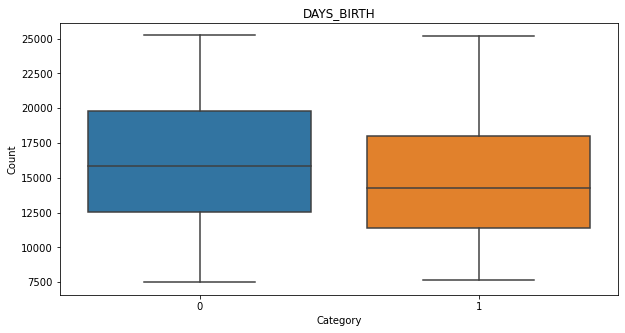

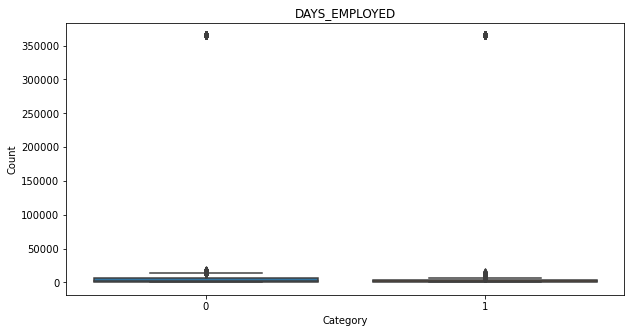

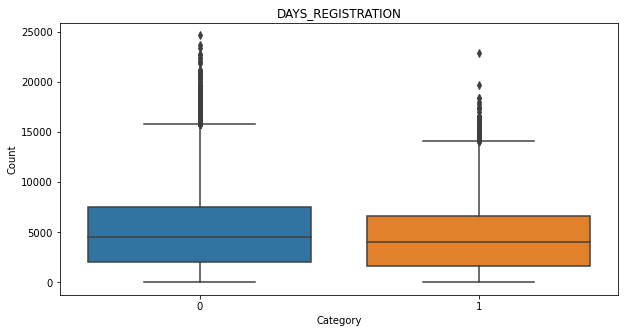

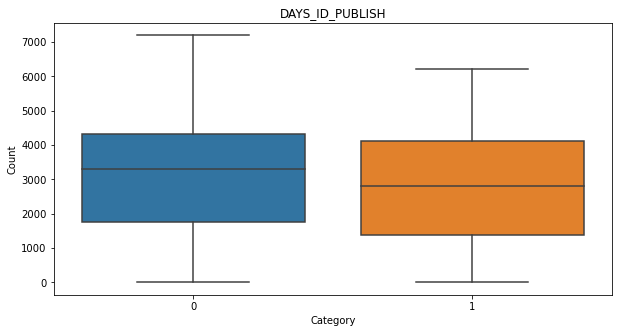

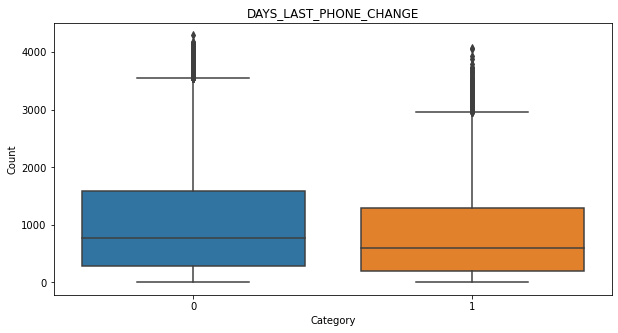

In [130]:
#Graphs for list_continuous_variables

for i in range (len(list_continuous_variables)):
    analyze_graph_boxplot(list_continuous_variables[i])

#### Insights:

        (a) DAYS_BIRTH: The people having younger age are more likely to default.
        
        (b) DAYS_EMPLOYED: Outliers exist in the variable and need to be handled for better insight.
        
        (c) DAYS_REGISTRATION: The defaulters are likely to change their registration recently in comparison with non-defaulters.
        
        (d) DAYS_ID_PUBLISH: Defaulters are likely to have changed their ID document with which they applied for the loan recently in comparison with non-defaulters.
        
        (e) DAYS_LAST_PHONE_CHANGE: Defaulters are likely to have changed their phone recently in comparison with non-defaulters.

### 8(b)(iv) Analysis of Categorical Variables

In [131]:
list_categorical_variables=['NAME_CONTRACT_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

In [132]:
#Function for drawing graphs for Categorical variables

def analyze_graph_categorical(df):
    plt.figure(figsize=(20,5))
    sns.countplot(x=df, hue='TARGET',data=df_application)
    plt.title(df)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.yscale('log') # We will use log scale to accommodate the vast range of values
    plt.show()

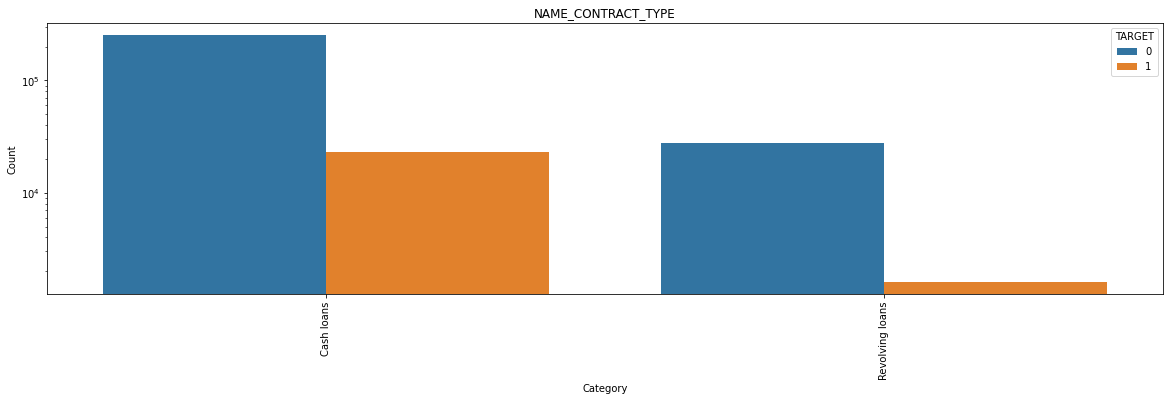

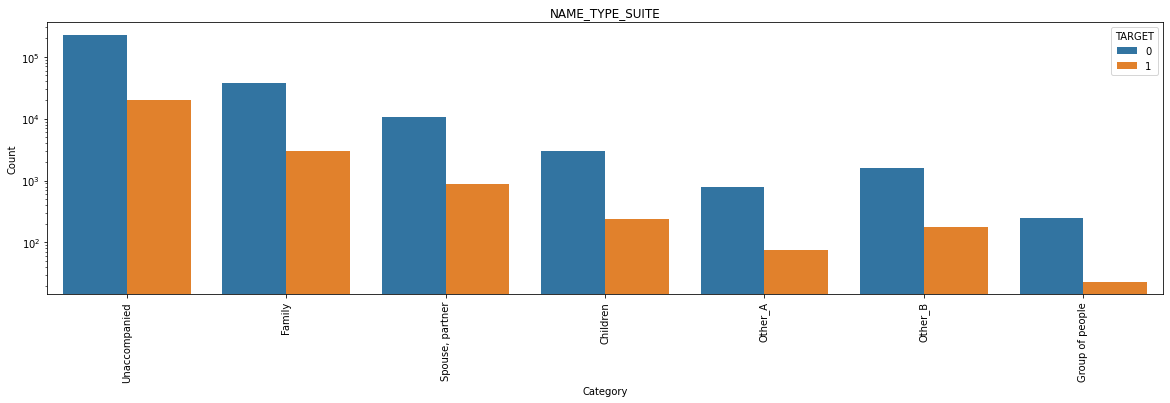

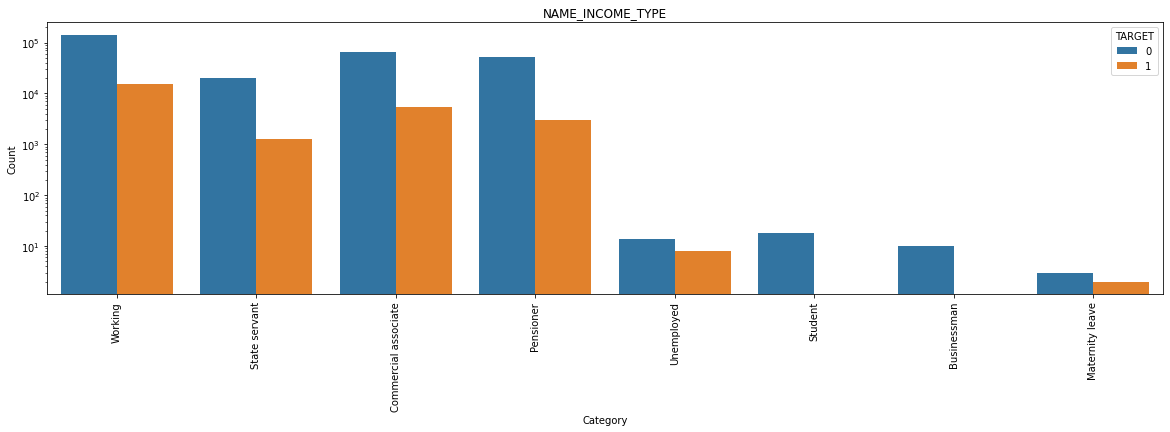

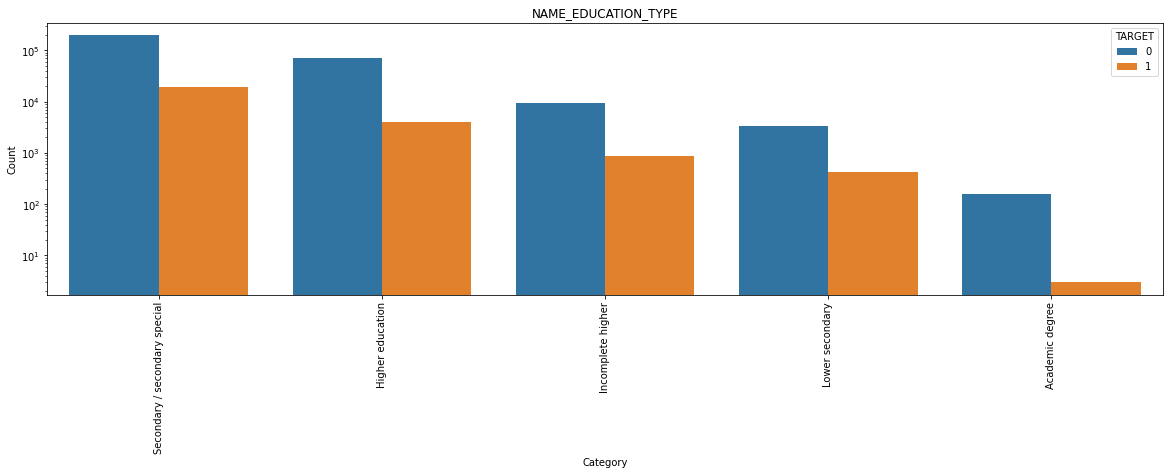

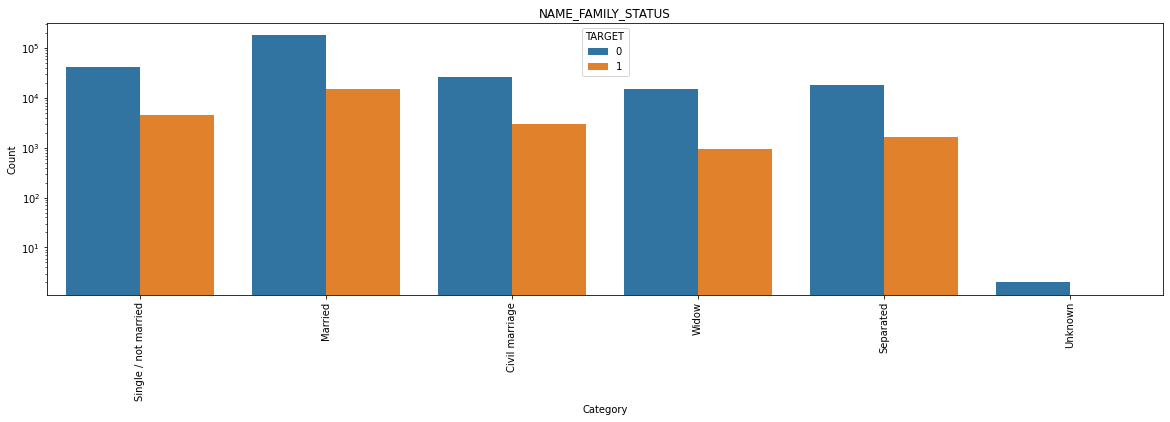

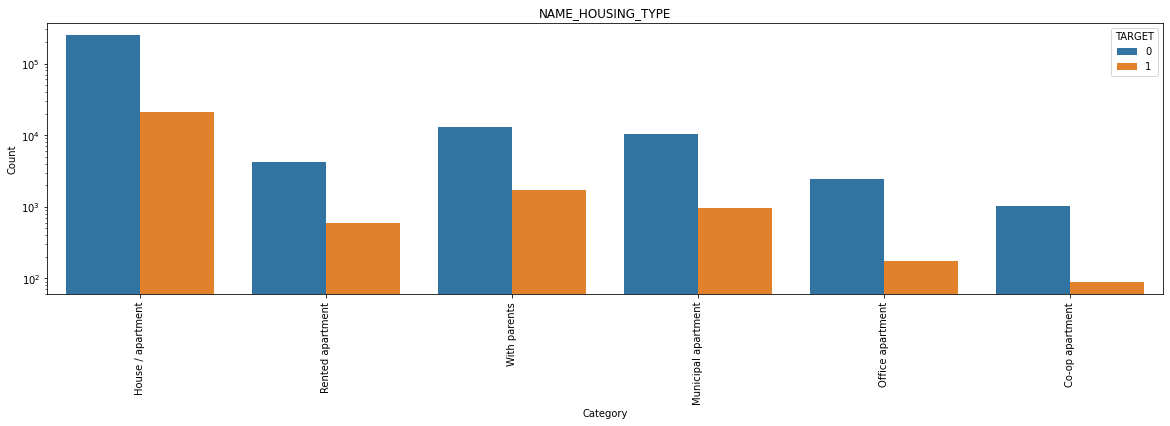

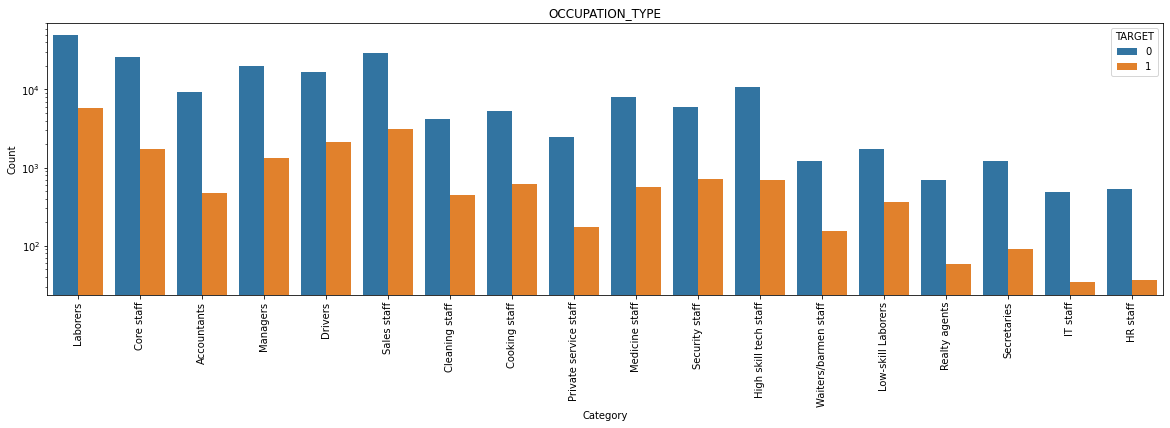

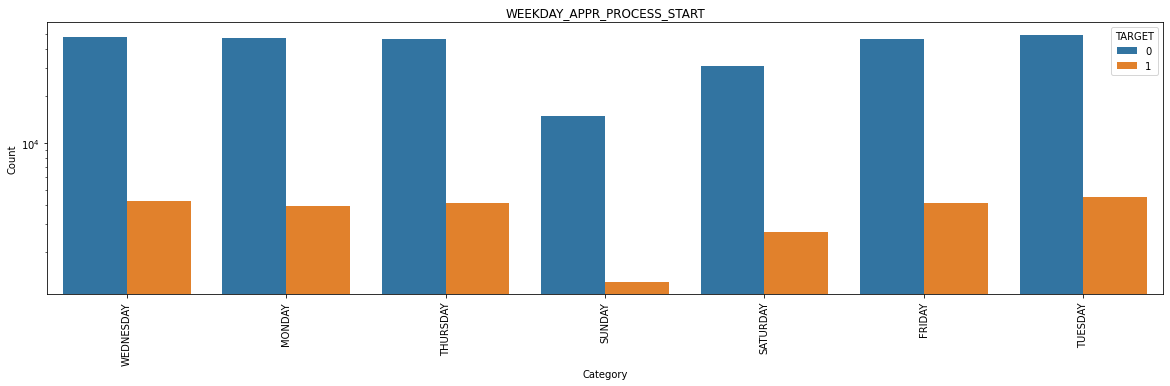

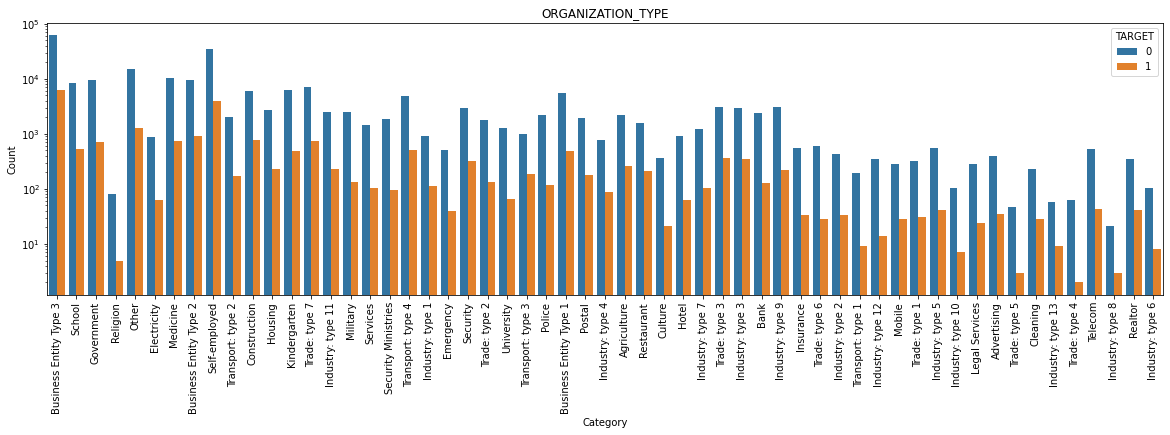

In [133]:
#Graphs for list_categorical_variables

for i in range (len(list_categorical_variables)):
    analyze_graph_categorical(list_categorical_variables[i])

#### Insights:

    (a) NAME_CONTRACT_TYPE: Cash loans are more popular than revolving loans.
    
    (b) NAME_TYPE_SUITE: Majority of loan defaulters had come unaccompanied.
    
    (c) NAME_INCOME_TYPE: Loan defaulters are mainly from Working, Commercial Associate, Pensioner, State Servant category. Students and Businessmen have very less defaulters.
    
    (d) NAME_EDUCATION_TYPE: Maximum defaulters have Secondary education.
    
    (e) NAME_FAMILY_STATUS: Majority of loan defaulters are married.
    
    (f) NAME_HOUSING_TYPE: Majority of loan defaulters are staying in their own houses/ apartments.
    
    (g) OCCUPATION_TYPE: Majority of defaulters are labourers.
    
    (h) WEEKDAY_APPR_PROCESS_START: Least approval processes are commencing on Sundays.
    
    (j) ORGANIZATION_TYPE: Max defaulters are from Business Entity Type 3

### 8(b)(v) Bivariate Analysis

#### Note: For Bivariate analysis we will make use of the two dataframes that we had extracted earlier. i.e. df_defaulters (where TARGET=1) and df_nondefaulters (where TARGET=0)

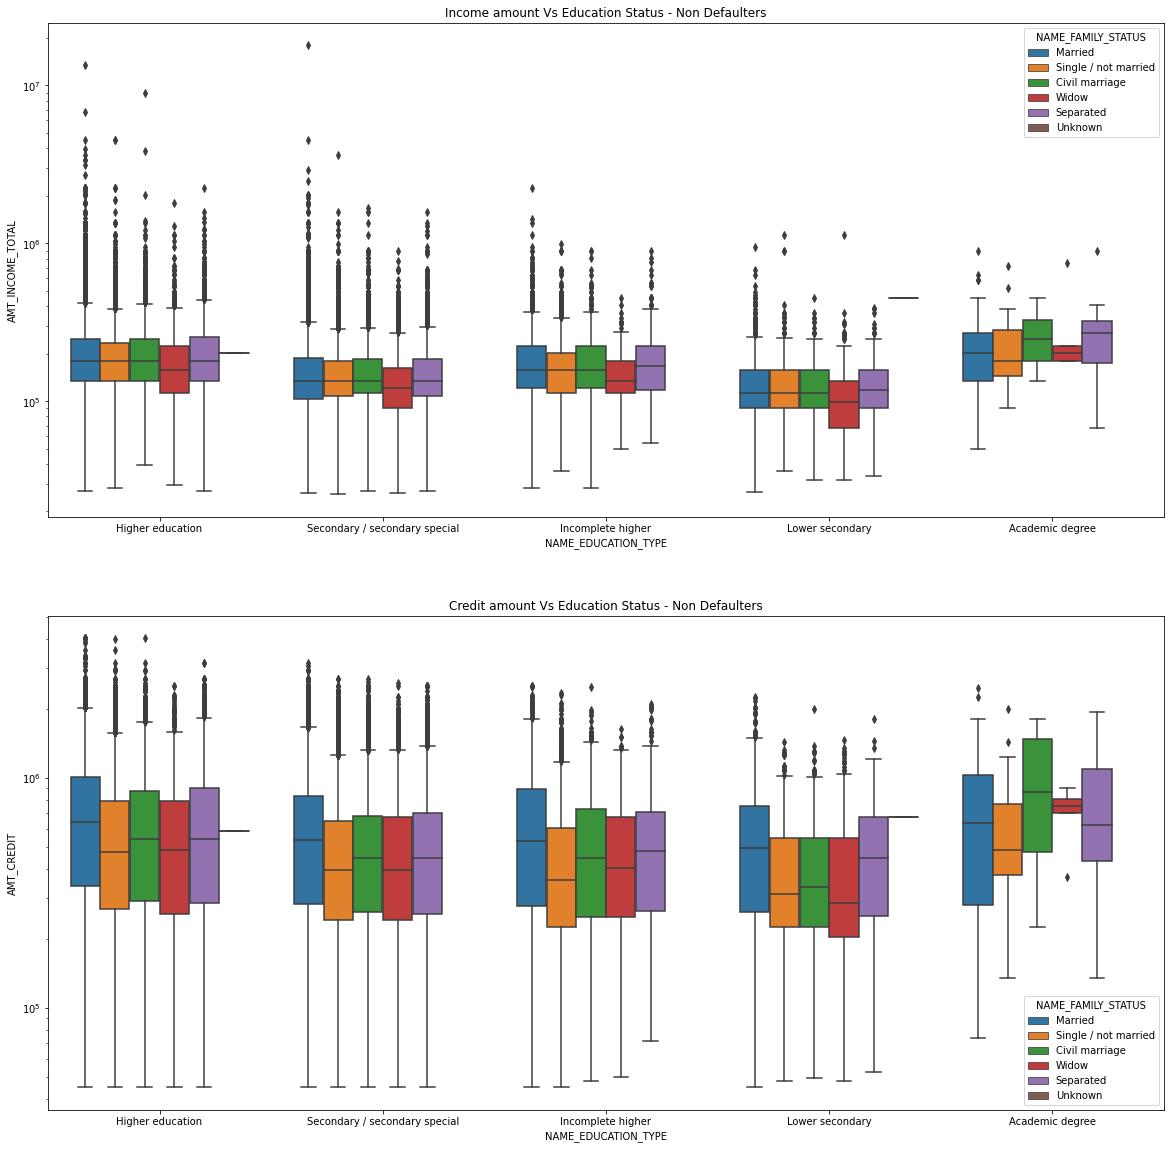

In [134]:
#Bivariate analysis between 'Income Amount Vs Education Status' and 'Credit Amount Vs Education Status' for clients of different family status in respect of non-defaulters
plt.figure(figsize=(20,20))

plt.subplot(2,1,1)
plt.yscale('log')
plt.title('Income amount Vs Education Status - Non Defaulters')
sns.boxplot(data=df_nondefaulters,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_FAMILY_STATUS',orient='v')

plt.subplot(2,1,2)
plt.yscale('log')
#plt.xticks(rotation=45)
plt.title('Credit amount Vs Education Status - Non Defaulters')
sns.boxplot(data=df_nondefaulters,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS',orient='v')


plt.show()

#### Insight (Non-Defaulters): 

    (a) Outliers are not observed in Civil Marriage family having academic degree in both Income amount Vs Education Status and Credit amount Vs Education Status.

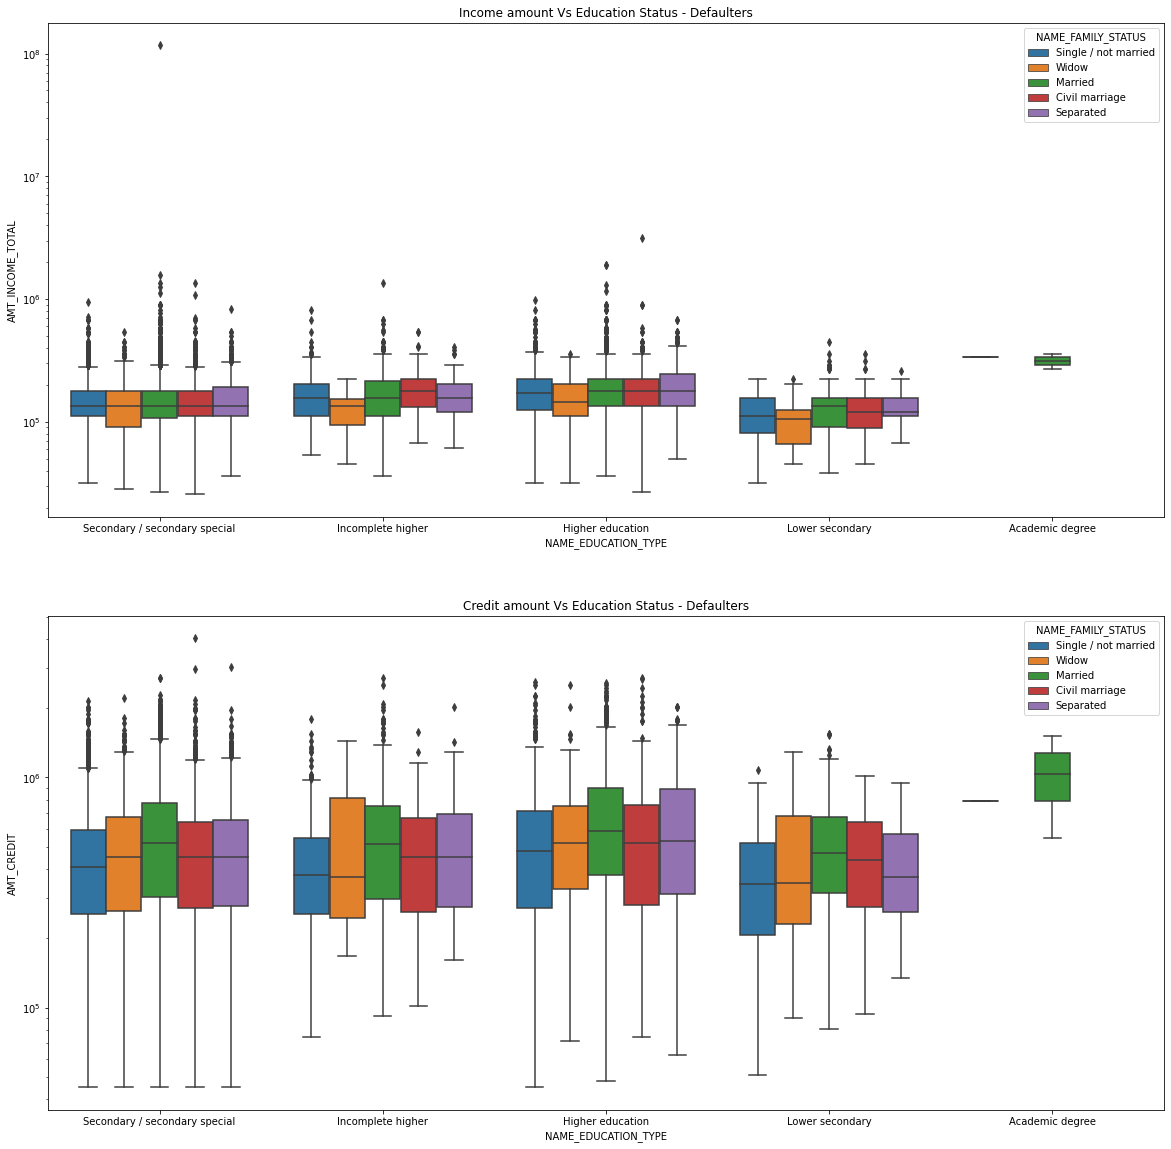

In [135]:
#We will undertake Bivariate analysis between 'Income Amount Vs Education Status' and 'Credit Amount Vs Education Status' for clients of different family status in respect of defaulters
plt.figure(figsize=(20,20))

plt.subplot(2,1,1)
plt.yscale('log')
plt.title('Income amount Vs Education Status - Defaulters')
sns.boxplot(data=df_defaulters,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_FAMILY_STATUS',orient='v')

plt.subplot(2,1,2)
plt.yscale('log')
#plt.xticks(rotation=45)
plt.title('Credit amount Vs Education Status - Defaulters')
sns.boxplot(data=df_defaulters,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS',orient='v')


plt.show()

#### Insight (Defaulters):

        (a) Outliers are not observed in widow family having incomplete higher education in both Income amount Vs Education Status and Credit amount Vs Education Status.
        
        (b) Outlier with exceptional income amount observed in married family in Income amount Vs Education Status.

### 8(c) Correlation

#### Note: We have to find top 10 correlation for clients with payment difficulties and all other cases. We have to find top correlation by segmenting data frame with respect to Target variable and find top correlation for each segmented data.

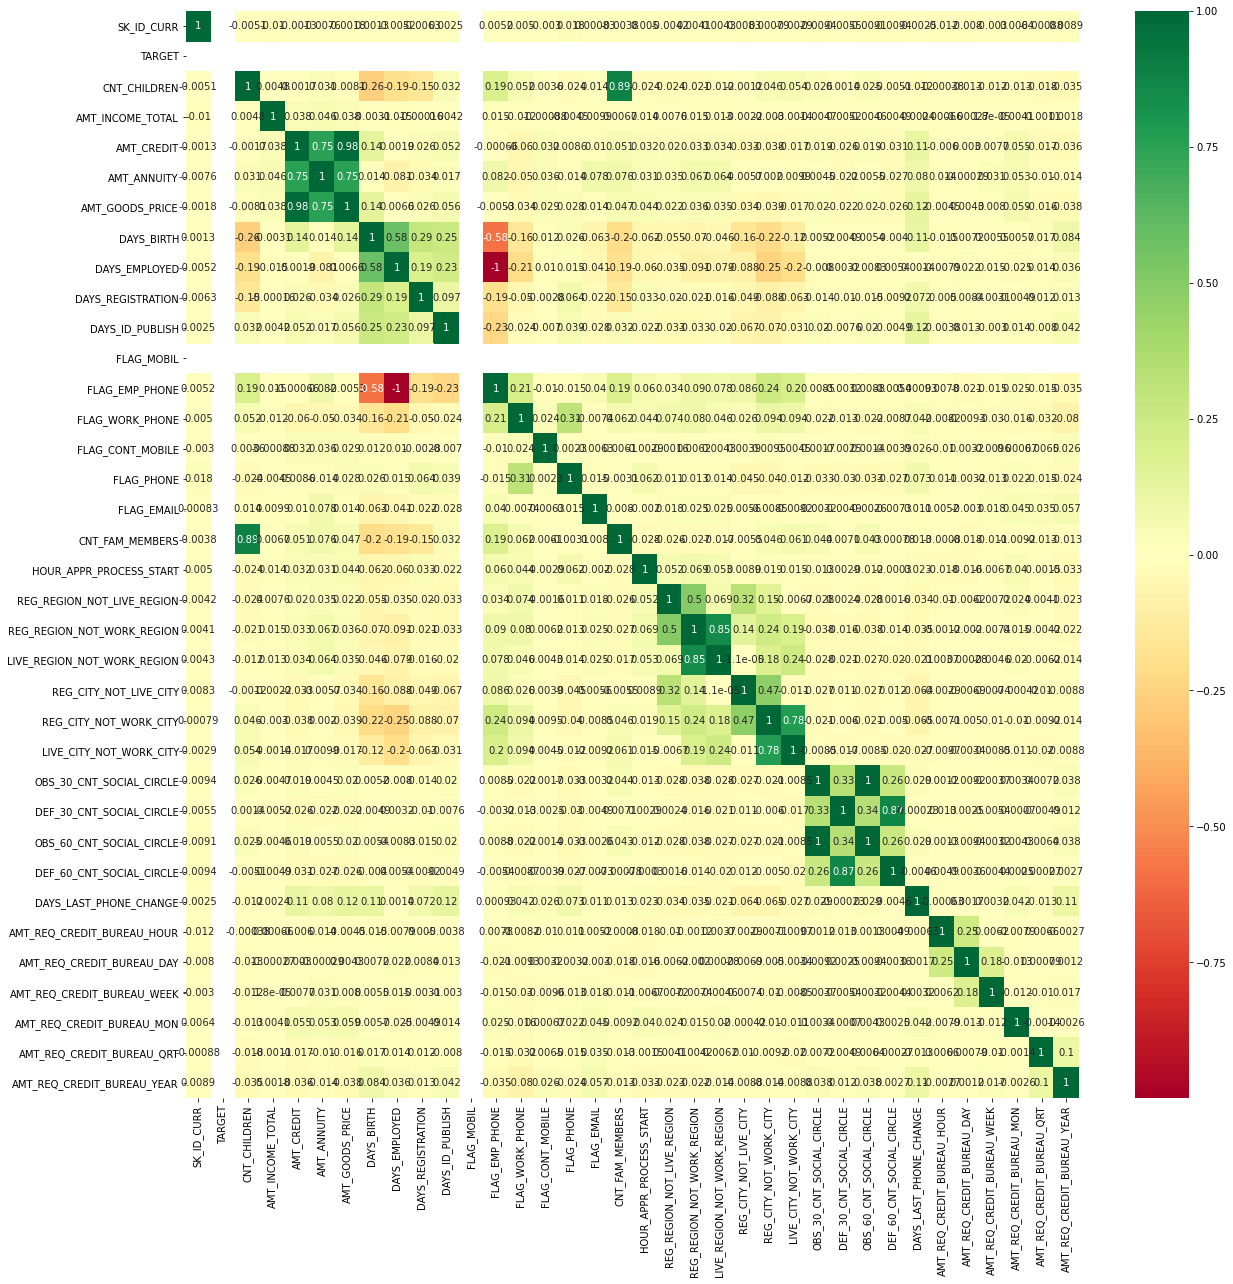

In [136]:
#We have already segmented the data with respect to TARGET variable earlier and have two data frames: df_defaulters and df_nondefaulters

#For defaulters

df_corr_defaulters=df_defaulters.corr() #Correlation Matrix is passed to df_corr_defaulters
plt.figure(figsize=(20,20))
sns.heatmap(df_corr_defaulters, cmap='RdYlGn', annot=True)
plt.show()

In [137]:
s=df_corr_defaulters.unstack()
so=s.sort_values(kind='quicksort', ascending=False)
print (so)

SK_ID_CURR                   SK_ID_CURR                     1.000000
REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_LIVE_REGION     1.000000
AMT_CREDIT                   AMT_CREDIT                     1.000000
AMT_ANNUITY                  AMT_ANNUITY                    1.000000
AMT_GOODS_PRICE              AMT_GOODS_PRICE                1.000000
DAYS_BIRTH                   DAYS_BIRTH                     1.000000
DAYS_EMPLOYED                DAYS_EMPLOYED                  1.000000
DAYS_REGISTRATION            DAYS_REGISTRATION              1.000000
DAYS_ID_PUBLISH              DAYS_ID_PUBLISH                1.000000
FLAG_EMP_PHONE               FLAG_EMP_PHONE                 1.000000
FLAG_WORK_PHONE              FLAG_WORK_PHONE                1.000000
FLAG_CONT_MOBILE             FLAG_CONT_MOBILE               1.000000
FLAG_PHONE                   FLAG_PHONE                     1.000000
FLAG_EMAIL                   FLAG_EMAIL                     1.000000
CNT_FAM_MEMBERS              CNT_F

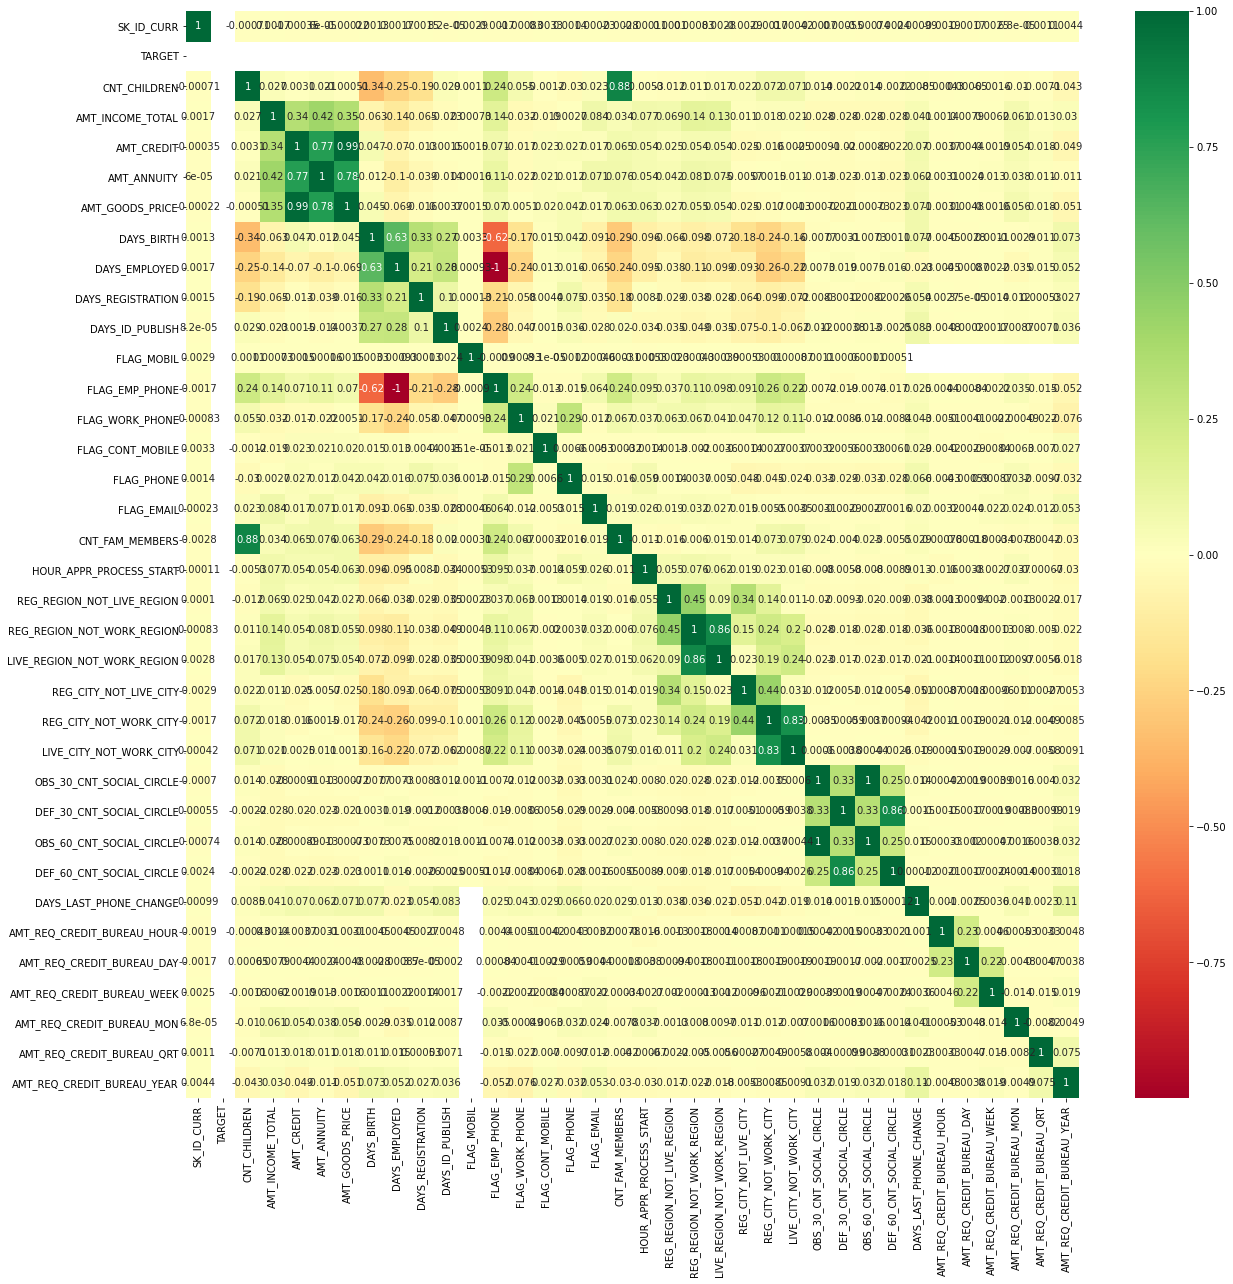

In [138]:
#For Non-defaulters

df_corr_nondefaulters=df_nondefaulters.corr() #Correlation Matrix is passed to df_corr_defaulters
plt.figure(figsize=(20,20))
sns.heatmap(df_corr_nondefaulters, cmap='RdYlGn', annot=True)
plt.show()

In [139]:
s=df_corr_nondefaulters.unstack()
so=s.sort_values(kind='quicksort', ascending=False)
print (so)

SK_ID_CURR                   SK_ID_CURR                     1.000000
REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_LIVE_REGION     1.000000
AMT_CREDIT                   AMT_CREDIT                     1.000000
AMT_ANNUITY                  AMT_ANNUITY                    1.000000
AMT_GOODS_PRICE              AMT_GOODS_PRICE                1.000000
DAYS_BIRTH                   DAYS_BIRTH                     1.000000
DAYS_EMPLOYED                DAYS_EMPLOYED                  1.000000
DAYS_REGISTRATION            DAYS_REGISTRATION              1.000000
DAYS_ID_PUBLISH              DAYS_ID_PUBLISH                1.000000
FLAG_MOBIL                   FLAG_MOBIL                     1.000000
FLAG_EMP_PHONE               FLAG_EMP_PHONE                 1.000000
FLAG_WORK_PHONE              FLAG_WORK_PHONE                1.000000
FLAG_CONT_MOBILE             FLAG_CONT_MOBILE               1.000000
FLAG_PHONE                   FLAG_PHONE                     1.000000
FLAG_EMAIL                   FLAG_

## 9. Data Insights of Previous Application Data

#### Note: 

    (a) We have already read the data earlier into 'df_previous' dataframe.
    
    (b) We have also undertaken familiarisation and data understanding earlier.
    
    (c) We will therefore commence with Data Cleaning.

### 9(a) Data Cleaning of 'df_previous'

In [140]:
#Ascertain Sum of Missing Values Columnwise

sum_missing_values_columnwise_df_previous=sum_missing_values_column(df_previous)
sum_missing_values_columnwise_df_previous

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [141]:
#Ascertain Percentage of Missing Values Columnwise

percentage_missing_values_columnwise_df_previous=percentage_missing_values_column(df_previous)
percentage_missing_values_columnwise_df_previous

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [142]:
#Total Number of Columns with Missing Values

sum_missing_values_columnwise_df_previous[sum_missing_values_columnwise_df_previous>0].count()

16

In [143]:
#Total Number of Columns with Missing Values percentage >50%

percentage_missing_values_columnwise_df_previous[percentage_missing_values_columnwise_df_previous>50].count()

4

#### Note: There are 4 columns in 'df_previous' that have more than 50% values missing. We can remove these columns since these may not be able to aid us in our analysis. <br>

In [144]:
#Columns with more than 40% data missing

Fifty_percent_missing_columns_df_previous=percentage_missing_values_columnwise_df_previous[percentage_missing_values_columnwise_df_previous>50]
Fifty_percent_missing_columns_df_previous

AMT_DOWN_PAYMENT            53.636480
RATE_DOWN_PAYMENT           53.636480
RATE_INTEREST_PRIMARY       99.643698
RATE_INTEREST_PRIVILEGED    99.643698
dtype: float64

In [145]:
#Dropping Columns with more than 50% data missing from 'df_application'

df_previous=df_previous.drop(Fifty_percent_missing_columns_df_previous.index,axis=1)

In [146]:
#To check whether the Columns have been dropped (Initial columns = 37)

df_previous.shape

(1670214, 33)

In [147]:
#Columns with missing data greater than 0 but less than equal to 50% in descending order

Less_than_Fifty_percent_missing_data_df_previous = percentage_missing_values_columnwise_df_previous[(percentage_missing_values_columnwise_df_previous>0) & (percentage_missing_values_columnwise_df_previous<=50)]
print(Less_than_Fifty_percent_missing_data_df_previous.sort_values(ascending=False))
print('Number of Columns with missing data greater than 0% but less than equal to 50% : ',len(Less_than_Fifty_percent_missing_data_df_previous.index))

NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
dtype: float64
Number of Columns with missing data greater than 0% but less than equal to 50% :  12


#### Note: 

    (a) Since the given problem statement states that in EDA, it is not necessary to replace missing values, we will not     replace any values.

### 9(b) Merging of 'df_application' with 'df_previous'

#### Note: We will use the common column 'SK_ID_CURR' to perform the merge

In [148]:
#Merging of df_application and df_previous

df_combined = pd.merge(left=df_application, right=df_previous, on='SK_ID_CURR', how='inner')

In [149]:
#Verifying the merge

df_combined.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_PRICE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-300000,400000-500000,20000-30000,300000-400000,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,200000-300000,>900000,30000-40000,>900000,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,200000-300000,>900000,30000-40000,>900000,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,200000-300000,>900000,30000-40000,>900000,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,Ho

In [150]:
df_combined.shape

(1413646, 84)

### 9(c) Dropping unnecessary columns from df_combined

#### Note: We will drop unnecessary columns from combined dataframe

In [151]:
#Dropping irrelevant Columns from 'df_combined'

df_combined.drop(['SK_ID_CURR',
                     'FLAG_LAST_APPL_PER_CONTRACT',
                     'NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

### 9(d) Performing univariate analysis

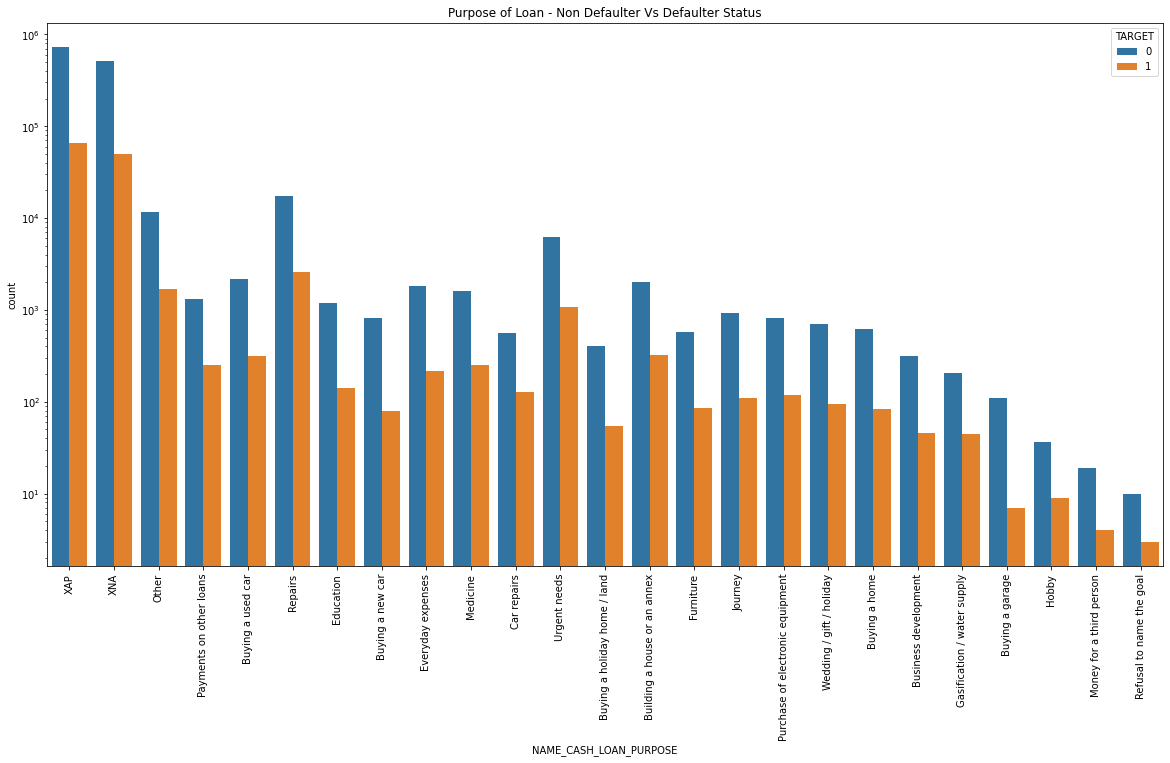

In [152]:
#Purpose of Loan - Non-Defaulter Vs Defaulter Status
plt.figure(figsize=(20,10))
plt.yscale('log') # We will use log scale to accommodate the vast range of values
sns.countplot(x='NAME_CASH_LOAN_PURPOSE', hue='TARGET',data=df_combined)
plt.title('Purpose of Loan - Non Defaulter Vs Defaulter Status')
plt.xticks(rotation=90)
     
plt.show()

#### Insight:

    (a) In certain cases, loan repayment is much better than loan default viz. Education, Buying a New Car, Buying a holiday home/land and Buying a Garage. These should become the focus areas for safe disbursal of loans.
    
    (b) Maximum defaulters are for loans taken for Repairs, Other and Urgent Needs.

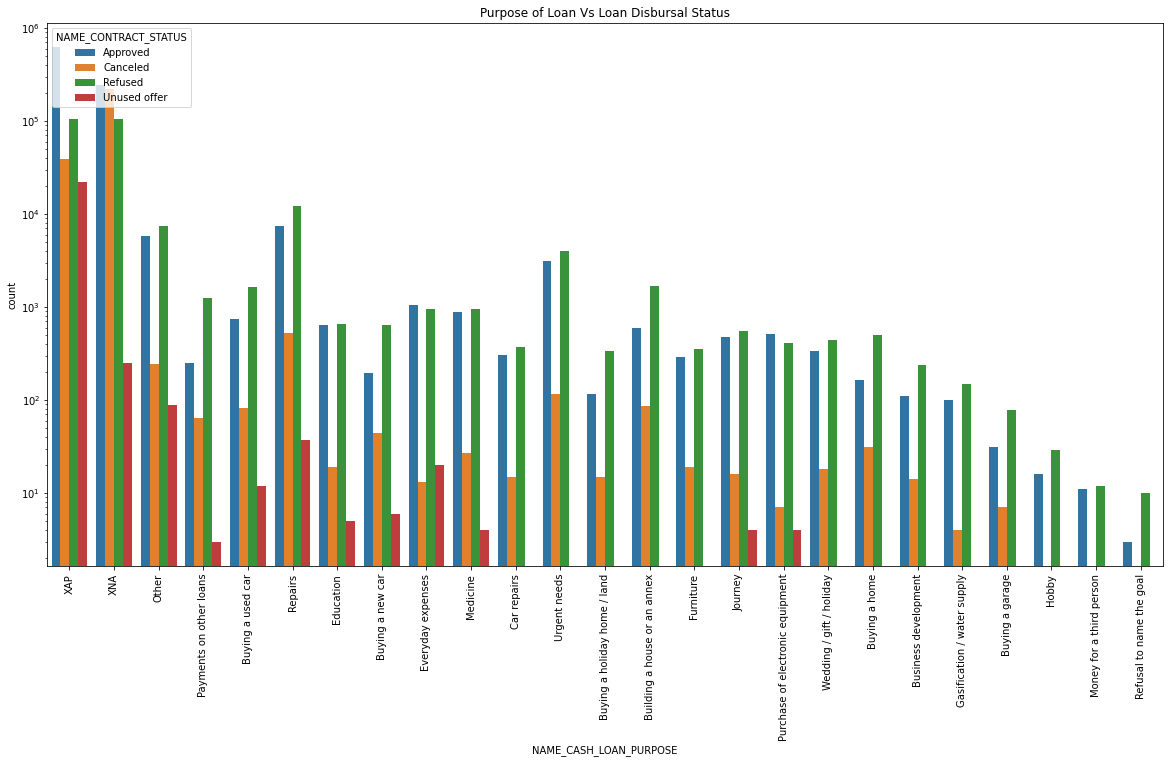

In [153]:
#Purpose of Loan Vs Loan Disbursal Status

plt.figure(figsize=(20,10))
plt.yscale('log') # We will use log scale to accommodate the vast range of values
sns.countplot(x='NAME_CASH_LOAN_PURPOSE', hue='NAME_CONTRACT_STATUS',data=df_combined)
plt.title('Purpose of Loan Vs Loan Disbursal Status')
plt.xticks(rotation=90)
     
plt.show()

#### Insight:

    (a) Maximum refusal is for loans pertaining to Repairs. This is good as in earlier graph we saw that Maximum defaulters were also from the same category.
    
    (b) Approval of loans is higher than refusal in case of Purchase of electronic equipment.

### 9(e) Performing bivariate analysis

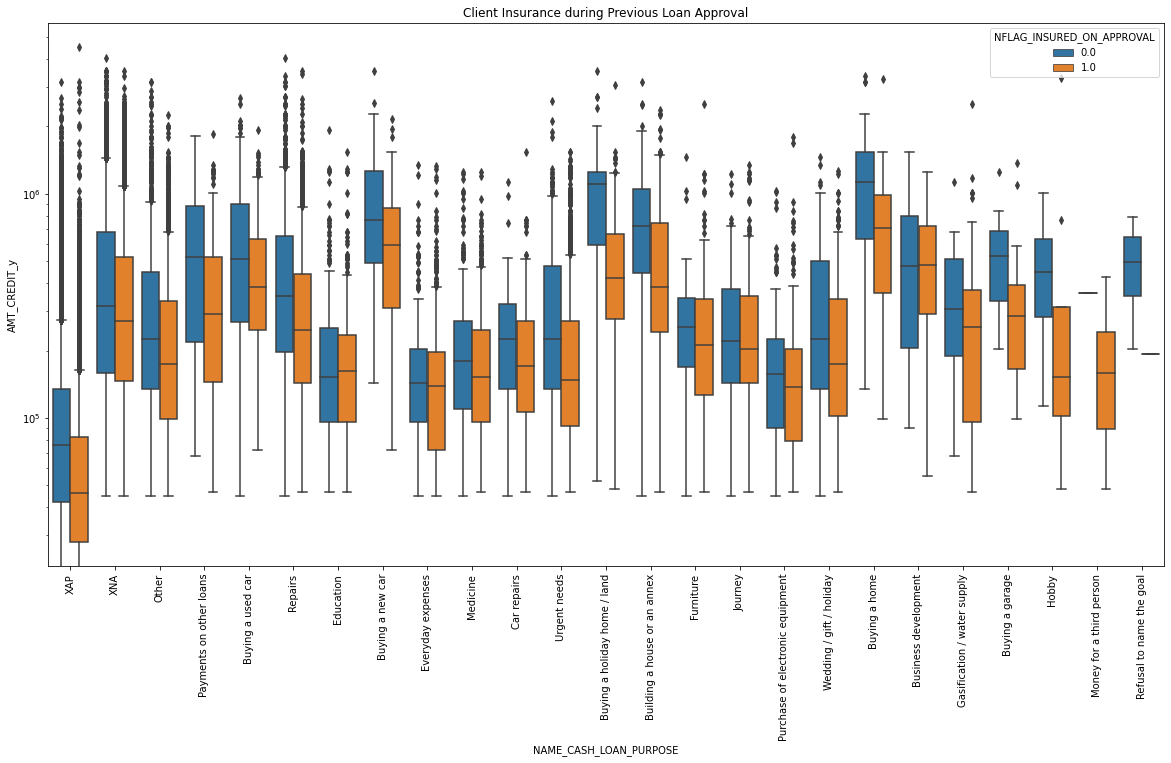

In [154]:
#Client Request for Insurance during Previous application

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data=df_combined, x='NAME_CASH_LOAN_PURPOSE', hue='NFLAG_INSURED_ON_APPROVAL', y='AMT_CREDIT_y')
plt.title('Client Insurance during Previous Loan Approval')
plt.show()

#### Insight:

    (a) Clients got insured in significant proportions while Buying a New Car, Buying a Holiday home/ Land, Building a house or an annex and Buying a Home. This can be used to club insurance offers with loans on such purposes.

## 10. Recommendations

    (a) A majority of clients did not provide their home phone. Percentage of defaulters were higher for clients who did not provide their home phone number.
    
    (b) Majority of the client's contact address matched work address. The percentage of defaulters were substantially higher for clients whose permanent address did not match contact address.
    
    (c) The percentage of defaulters tends to decrease with increase in income of the client.
    
    (d) The percentage of defaulters tends to increase with number of children of the client. This may be due to increased expenses and therefore, the applications for loans may be scrutinized for such cases.
    
    (e) Car owners are less susceptible to default than non-car owners.
    
    (f) The percentage of defaulters increases with credit amount of loan upto 500000-600000 range and then decreases thereafter.
    
    (g) The percentage of defaulters increases for clients with loan for goods worth 300000-400000 range and then decreases thereafter.
    
    (h) The least percentage of defaulters is for the clients having two family members. Also, the percentage of defaulters tends to increase with increase in family members.
    
    (j) The maximum number of loans were approved for clients who starting applying at 10 AM. The minimum loans were approved for clients who started applying around midnight and had high percentage of defaulters also.
    
    (k) Loan defaulters are mainly from Working, Commercial Associate, Pensioner, State Servant category. Students and Businessmen have very less defaulters.
    
    (l) In certain categories, loan repayment is much better than loan default viz. Education, Buying a New Car, Buying a holiday home/land and Buying a Garage. These should become the focus areas for safe disbursal of loans.
    
    (m) Maximum defaulters are for loans taken for Repairs, Other and Urgent Needs.
    
    (n) Clients got insured in significant proportions while Buying a New Car, Buying a Holiday home/ Land, Building a house or an annex and Buying a Home. This can be used to club insurance offers with loans on such purposes.